<a href="https://colab.research.google.com/github/Aiswaryadevi/AI-deeplearning/blob/master/natyagraphy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## framing

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import cv2
cap=cv2.VideoCapture("Adavu__Natta_2.mp4")
i=0
while(cap.isOpened()):
  ret,frame = cap.read()
  if ret == False:
    break
  cv2.imwrite('frm'+str(i)+'.jpg',frame)
  i=i+1
cap.release()
cv2.destroyAllWindows()


In [0]:
print(frame)

None


## video bg estimation

In [0]:
import numpy as np
import cv2
from skimage import data, filters

In [2]:
# Open Video
cap = cv2.VideoCapture('Adavu__Natta_2.mp4')
print(cap)

<VideoCapture 0x7f9bd00b23f0>


In [3]:
# Randomly select 25 frames
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=25)
print(frameIds)

[154.56394551 420.299939   416.0879294  427.9252635  421.07186737
 732.592697    94.37594571 205.37973731 355.4816939  224.12246937
 105.59379234 764.08552831 345.85006102 614.09630991 369.17869915
 752.2648296    3.67321014 210.77219263 254.4164396  144.26601953
  19.53924285 154.33451707 759.52944162 145.12692827 202.22877573]


In [0]:

# Store selected frames in an array
frames = []
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)
    #print(frame)

In [0]:
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    
#print(medianFrame)

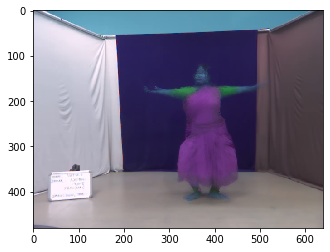

In [6]:
import matplotlib.pyplot as plt
# Display median frame
plt.imshow( medianFrame)
plt.show()

In [7]:
# Reset frame number to 0
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Convert background to grayscale
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
print(grayMedianFrame)

[[122 117 109 ...  53  54  54]
 [130 126 118 ...  55  56  56]
 [143 141 135 ...  57  57  57]
 ...
 [108 108 109 ... 146 145 145]
 [108 109 110 ... 146 145 145]
 [108 109 110 ... 146 145 145]]


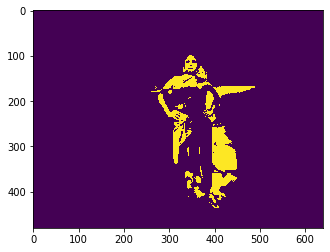

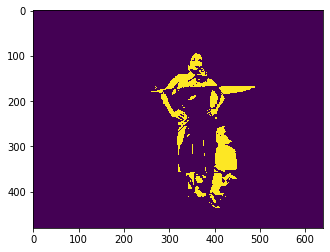

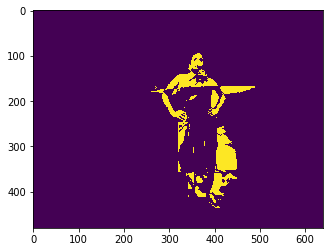

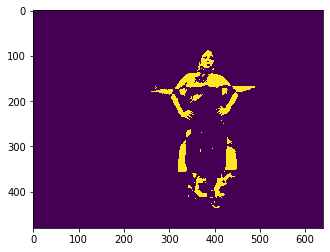

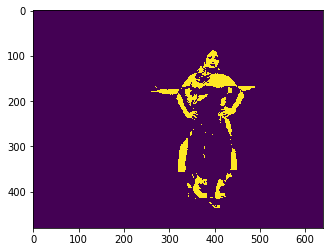

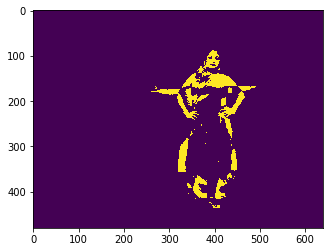

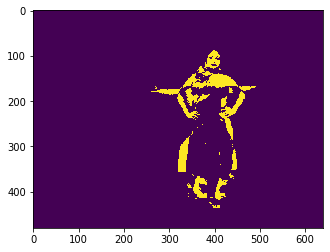

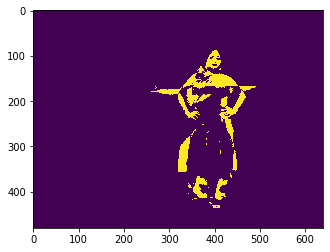

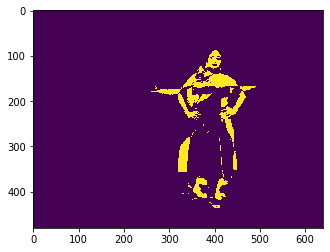

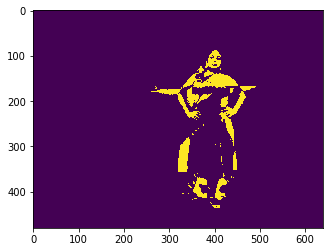

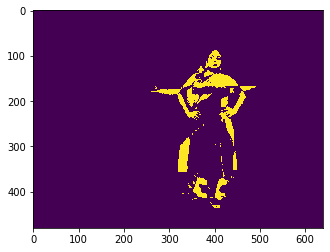

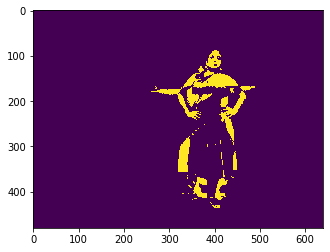

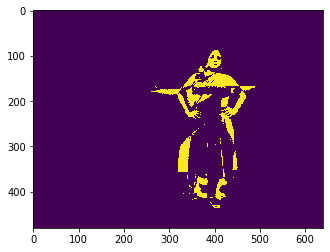

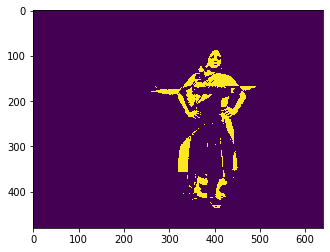

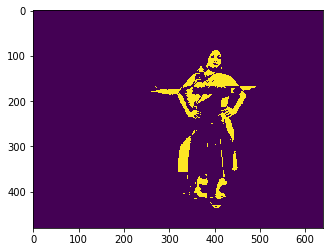

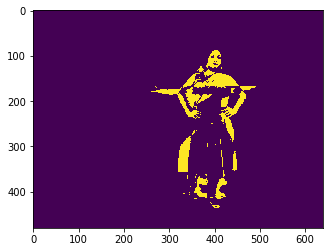

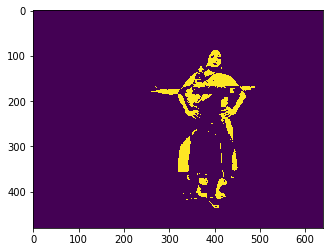

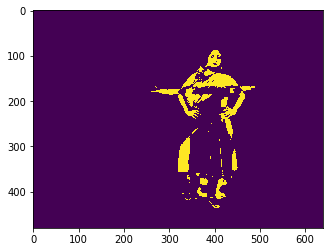

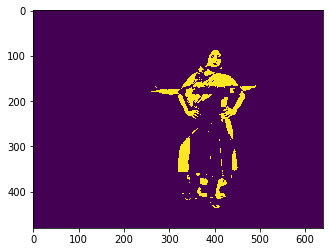

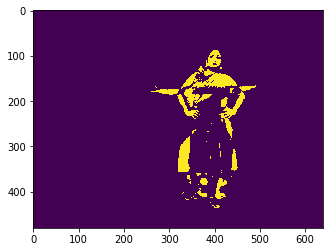

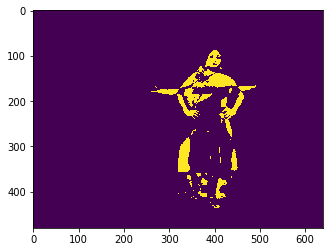

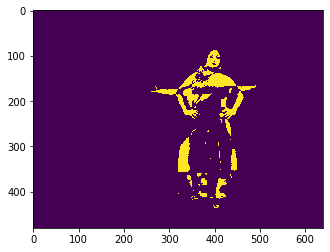

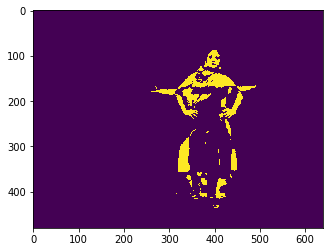

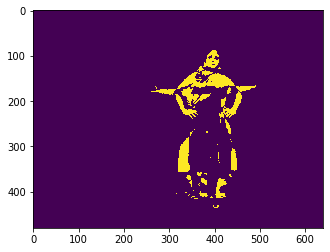

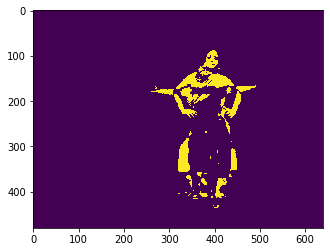

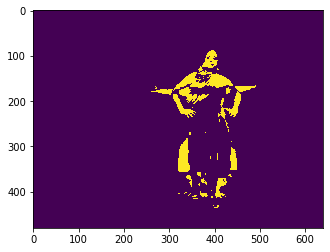

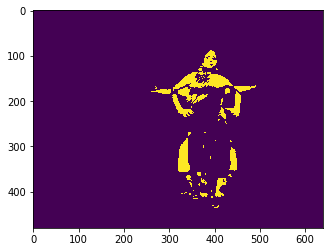

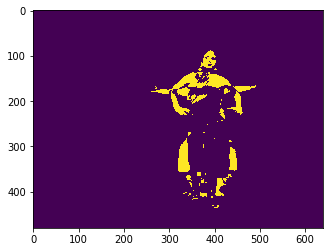

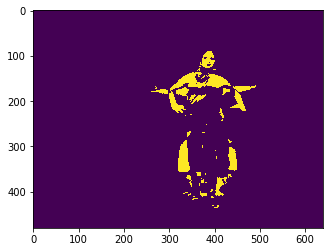

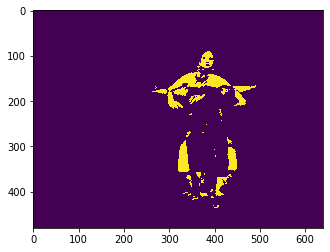

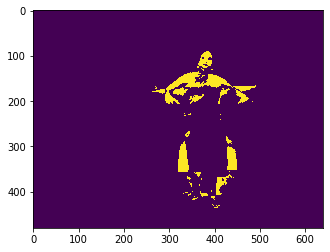

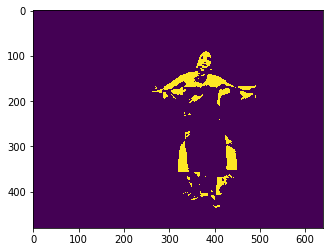

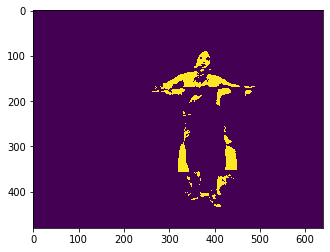

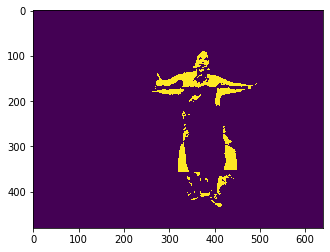

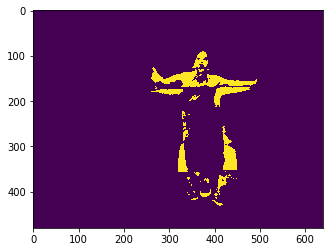

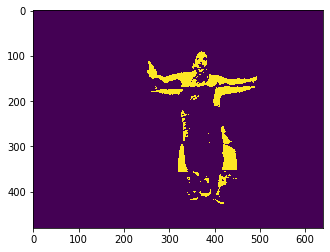

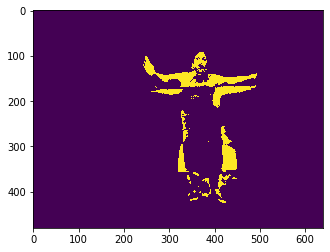

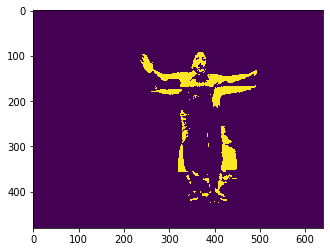

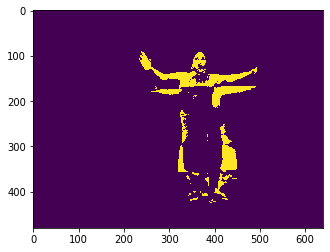

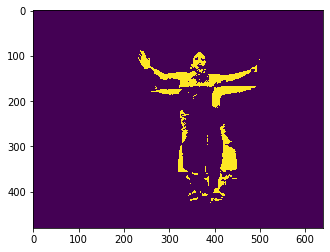

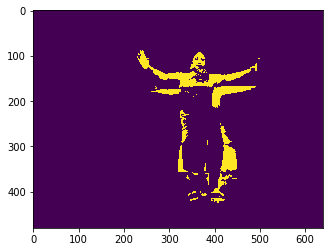

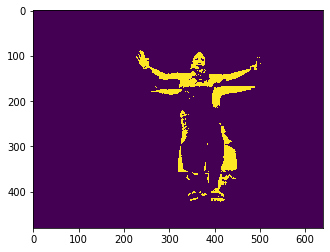

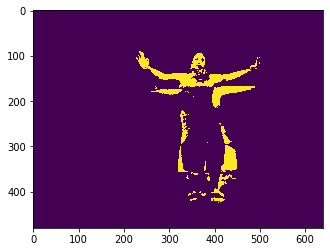

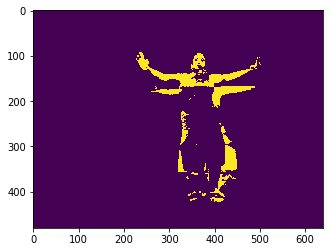

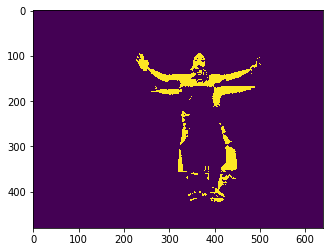

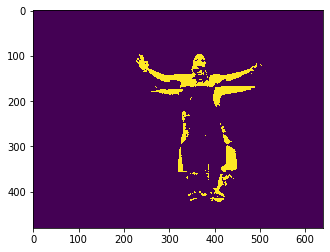

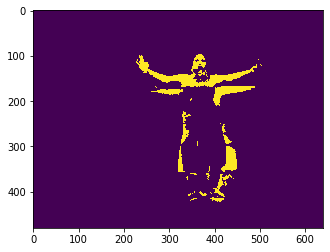

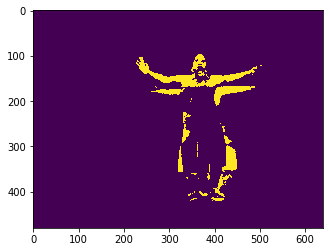

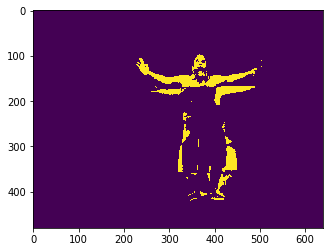

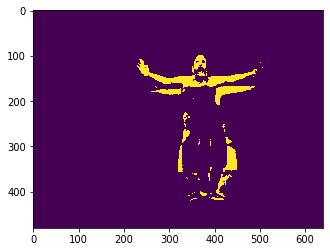

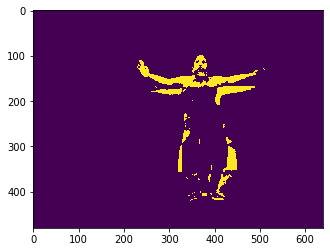

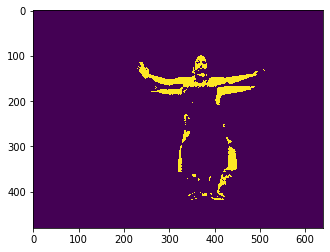

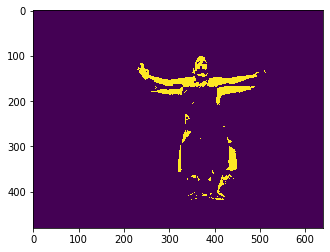

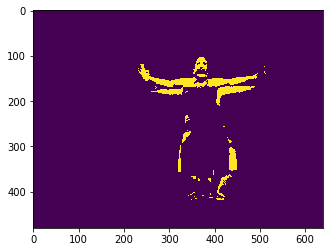

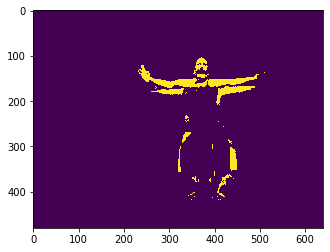

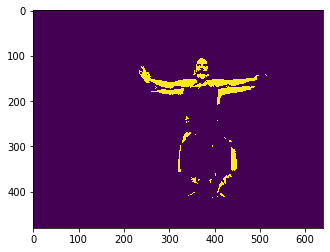

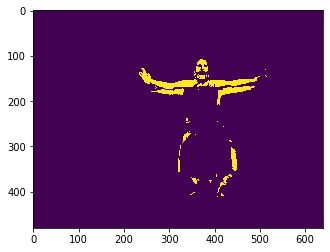

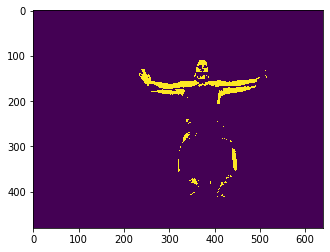

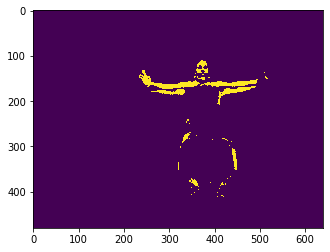

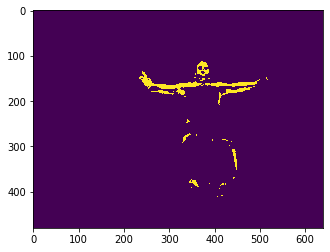

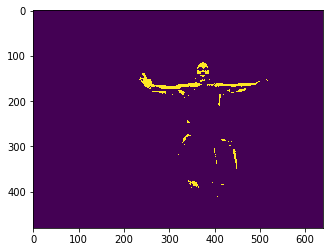

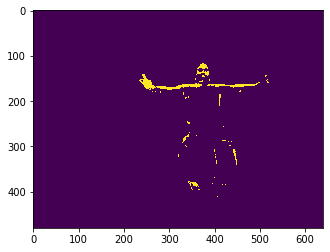

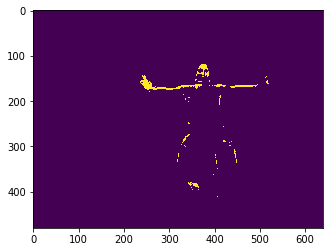

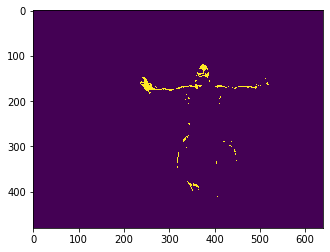

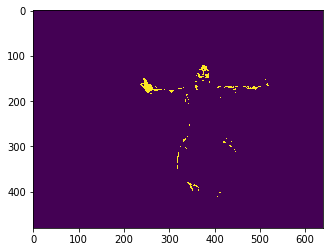

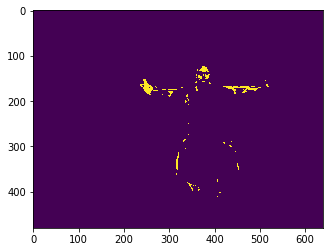

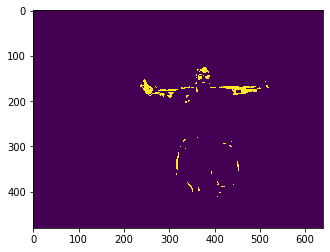

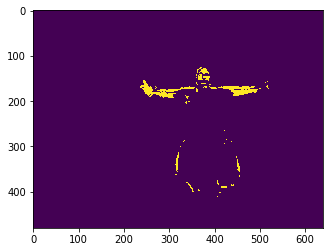

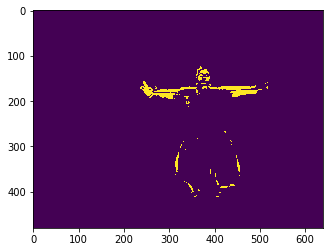

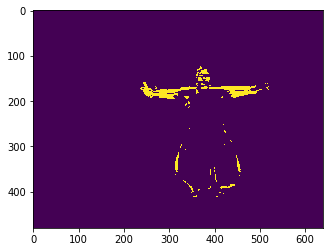

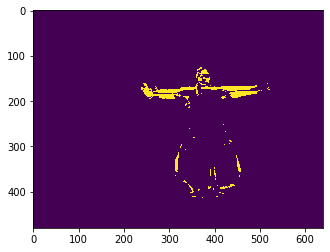

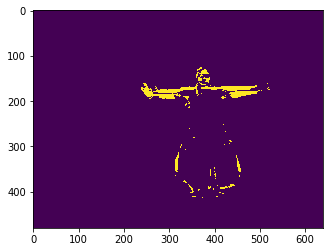

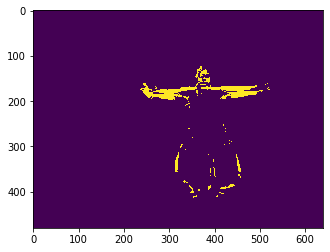

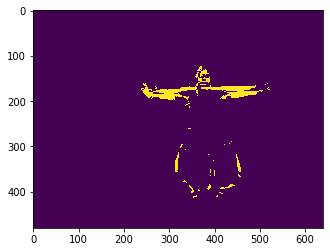

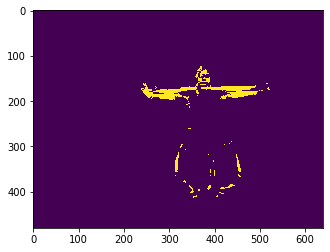

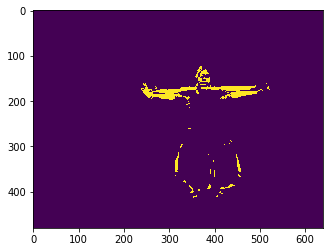

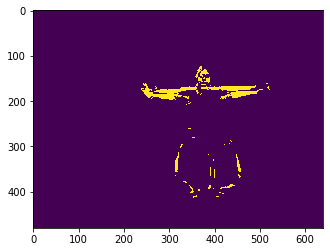

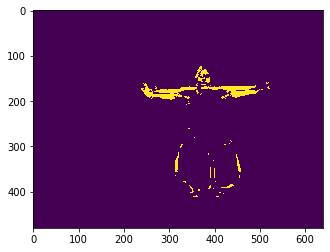

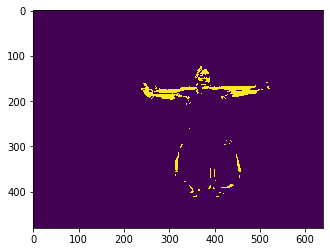

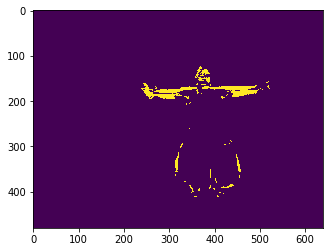

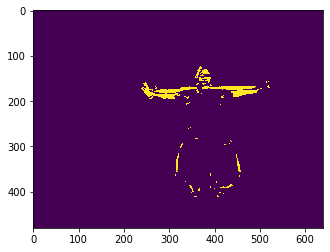

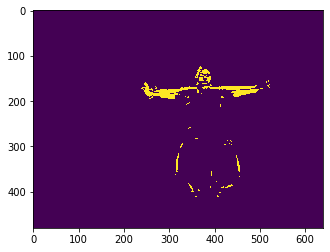

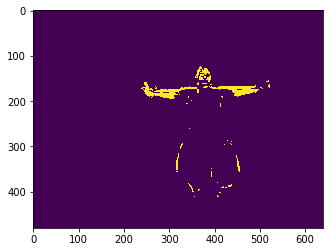

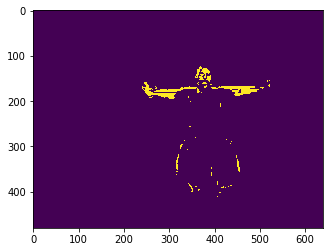

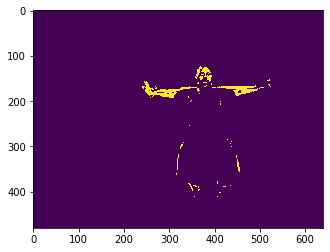

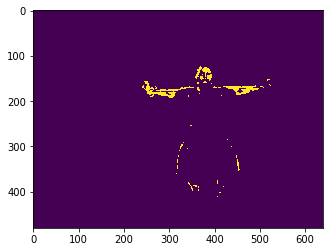

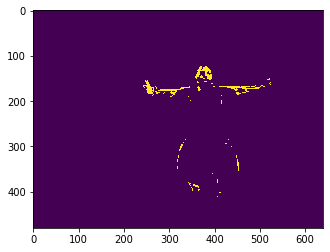

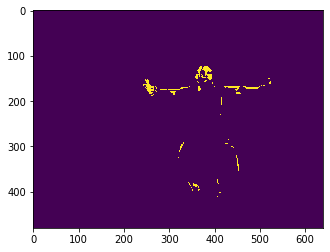

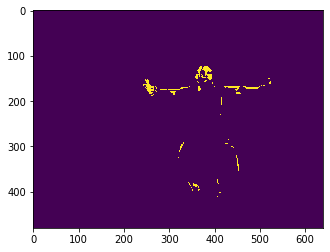

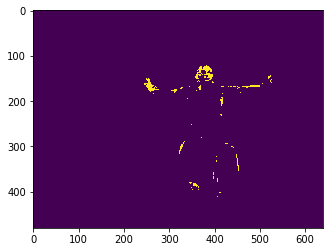

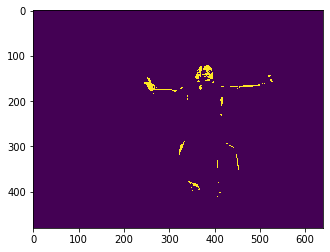

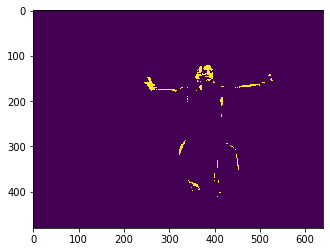

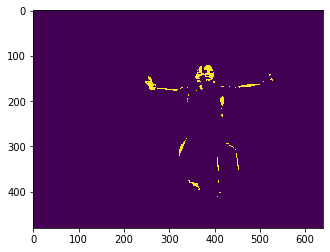

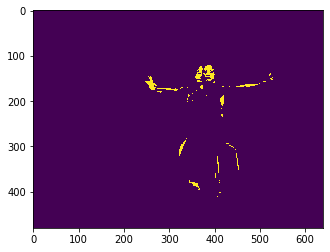

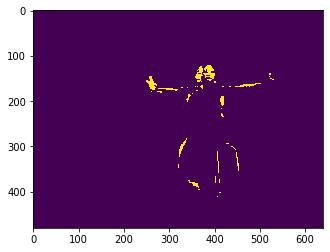

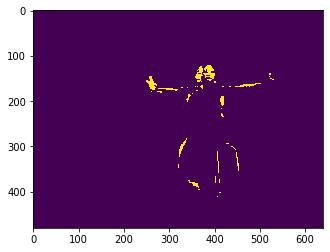

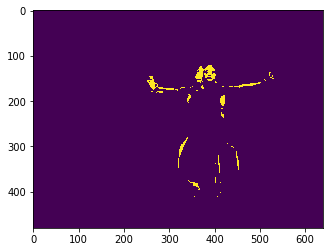

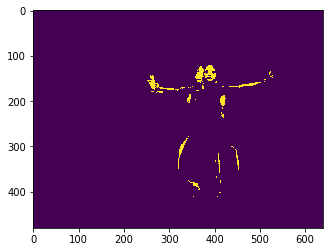

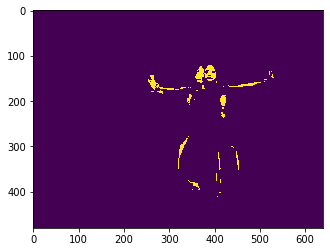

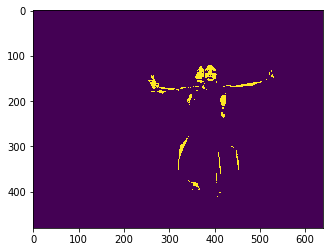

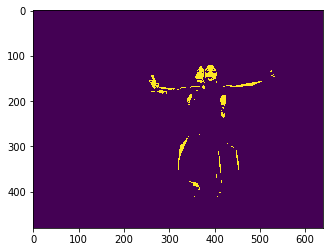

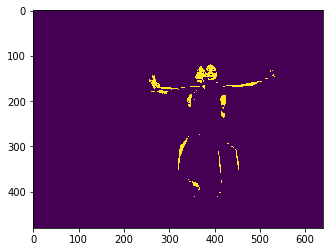

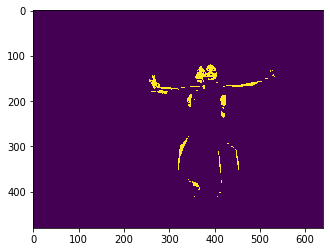

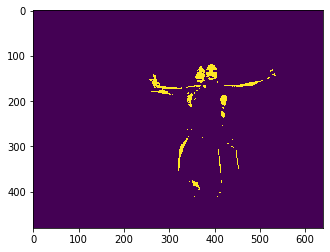

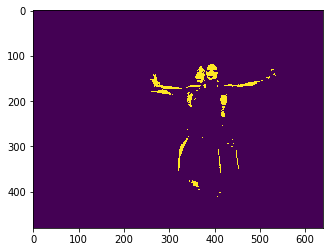

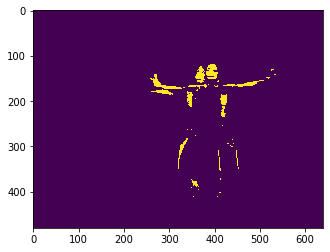

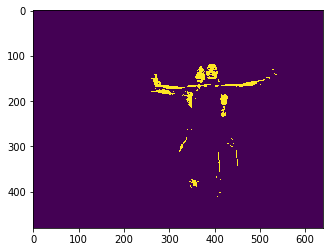

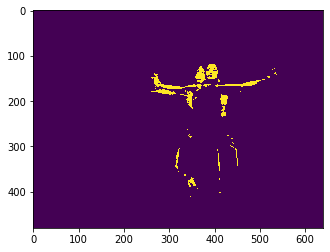

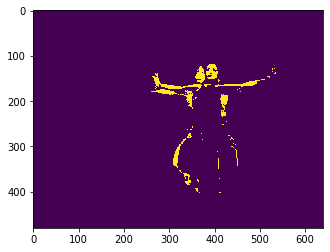

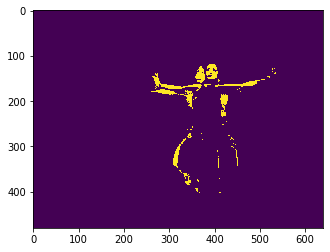

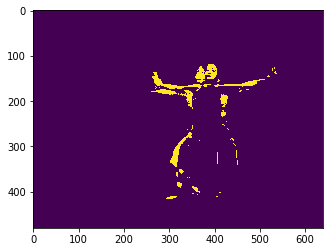

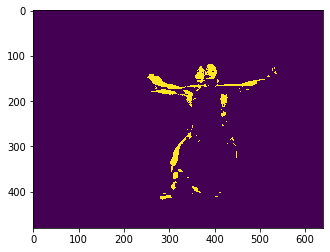

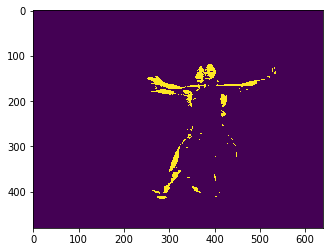

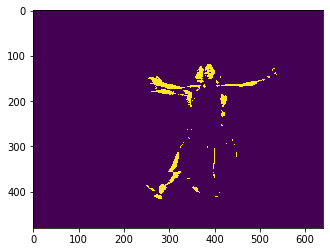

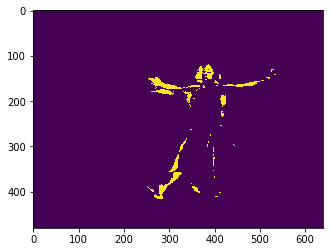

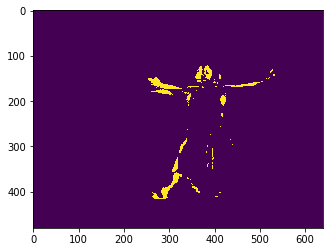

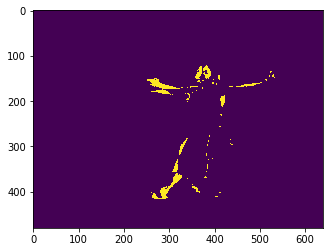

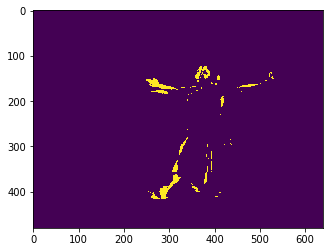

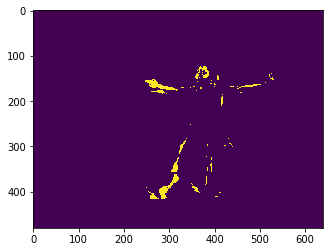

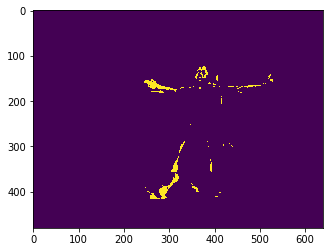

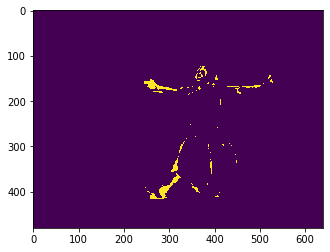

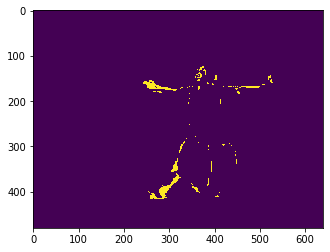

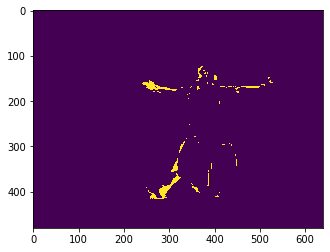

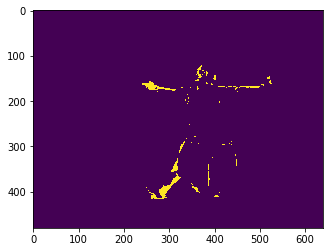

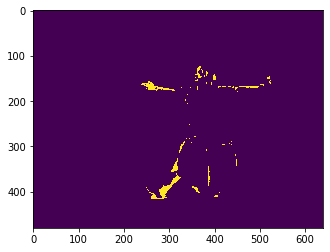

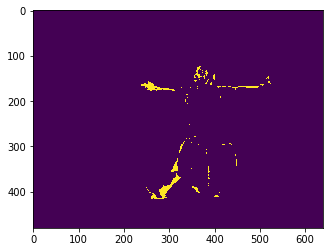

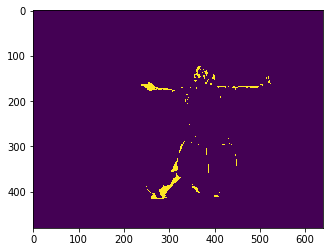

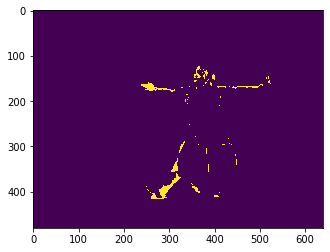

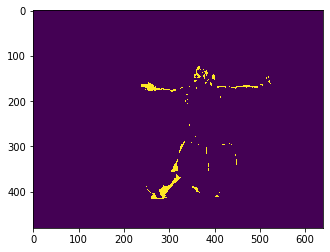

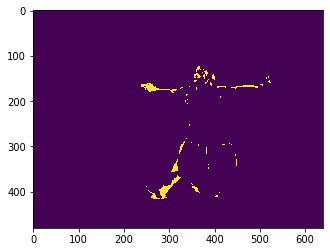

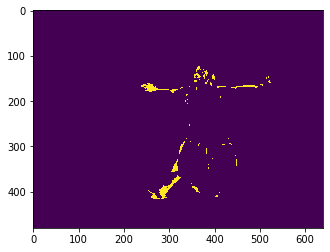

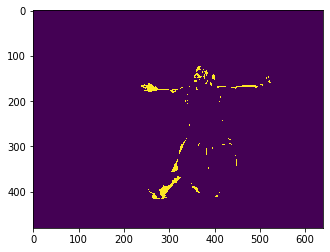

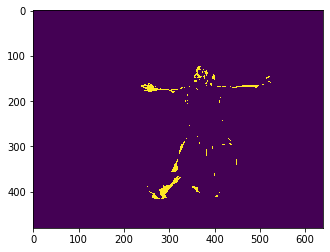

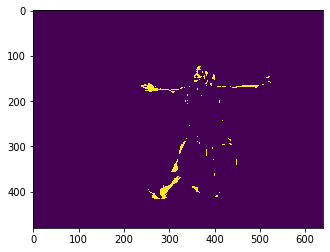

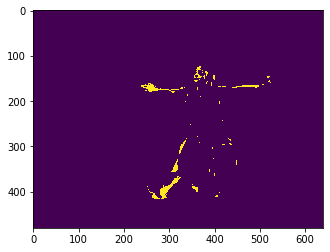

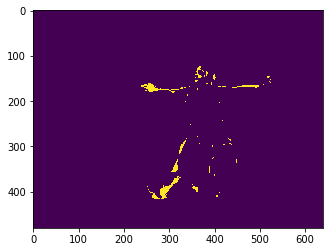

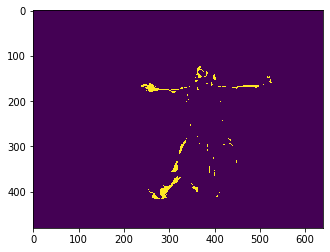

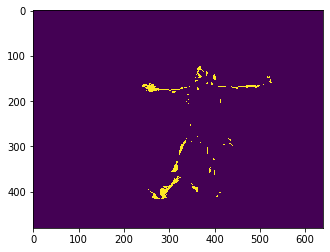

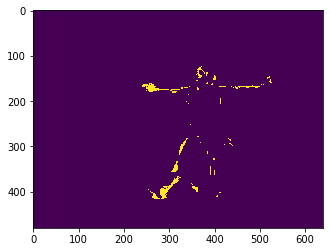

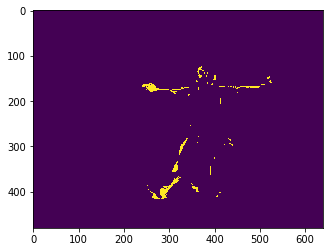

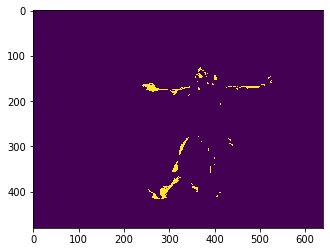

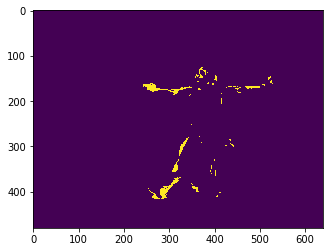

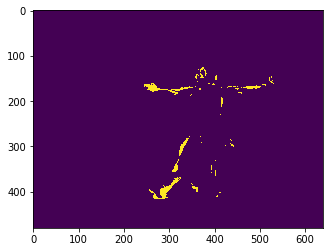

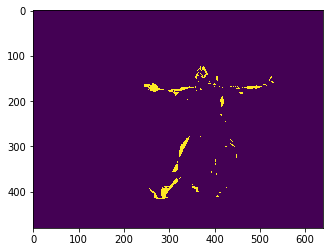

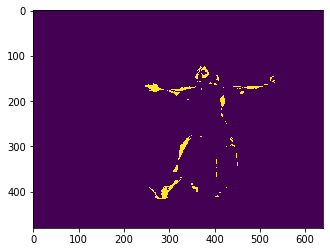

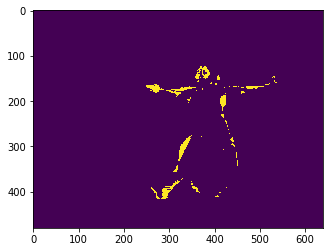

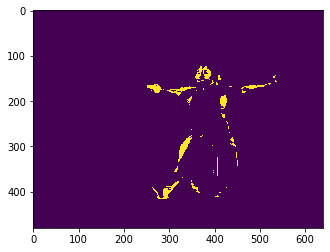

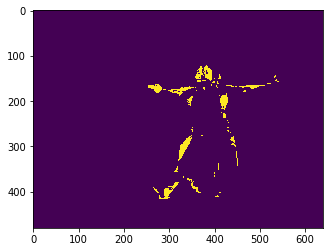

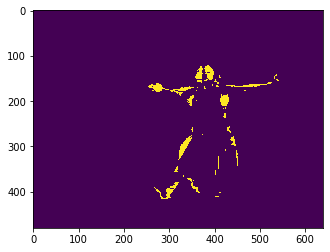

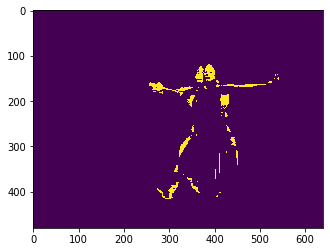

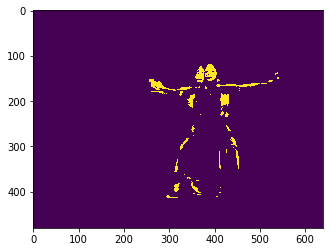

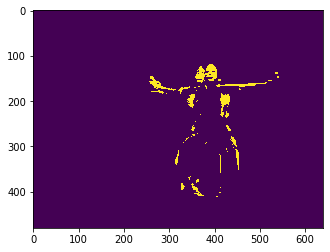

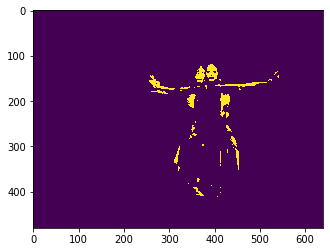

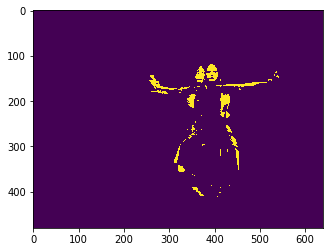

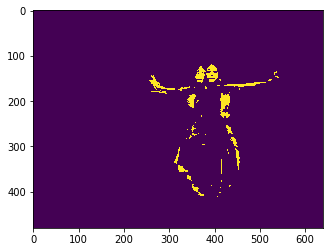

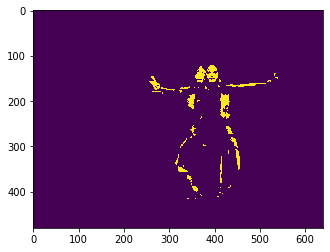

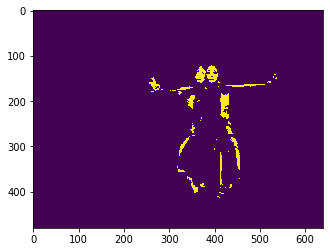

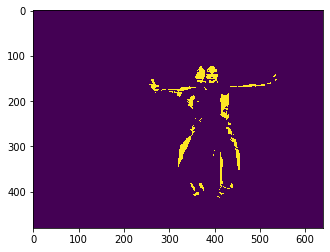

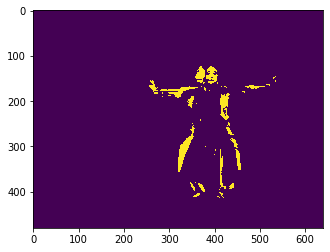

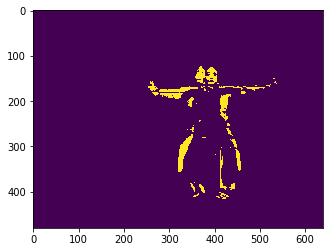

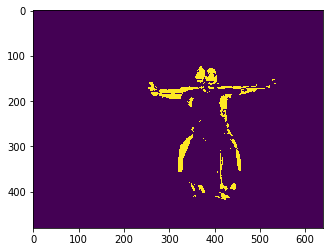

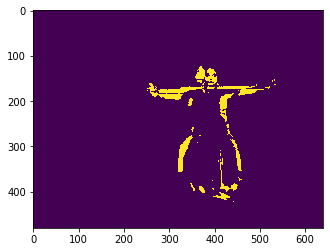

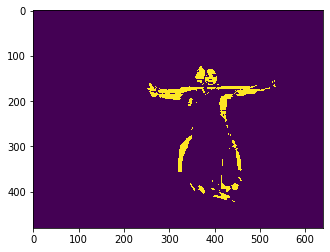

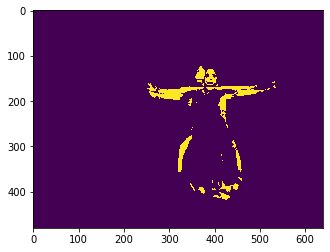

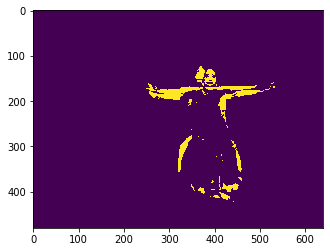

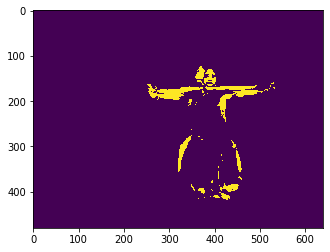

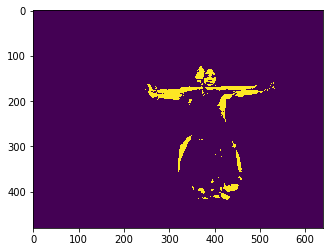

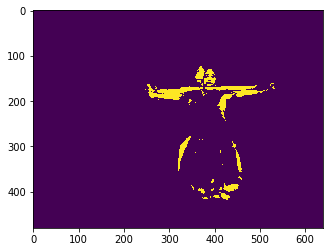

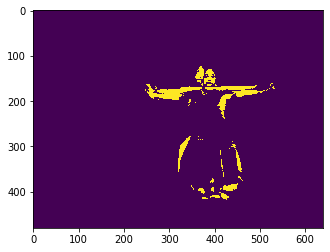

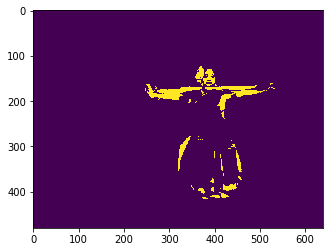

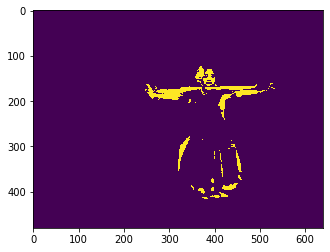

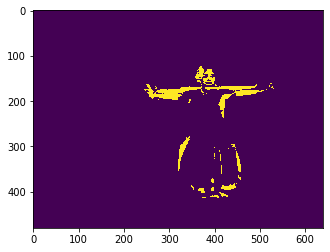

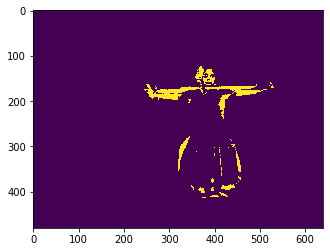

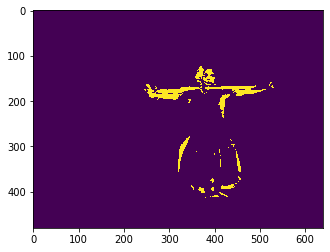

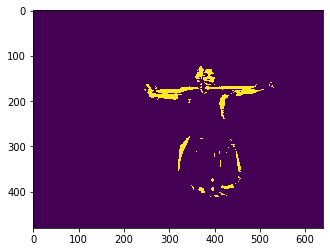

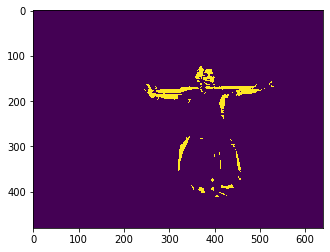

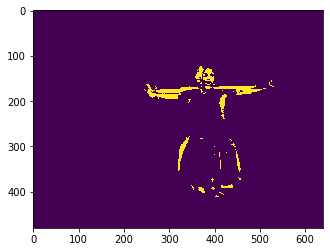

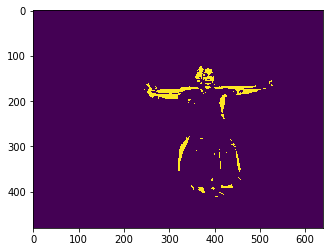

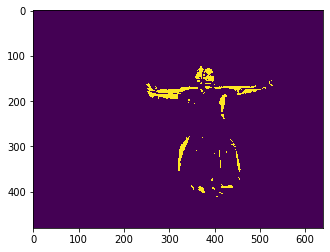

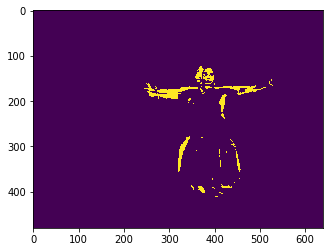

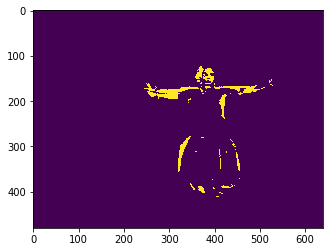

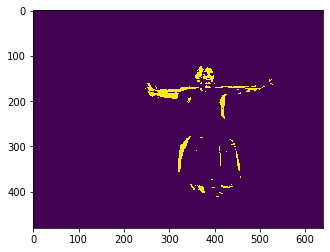

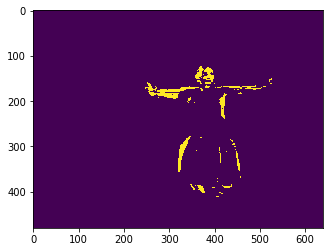

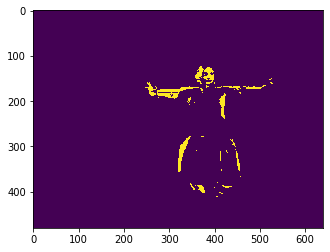

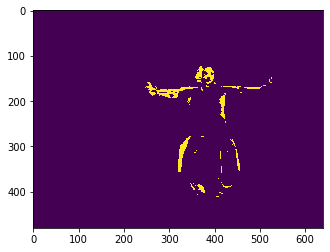

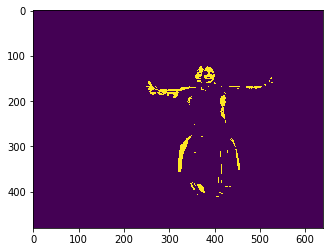

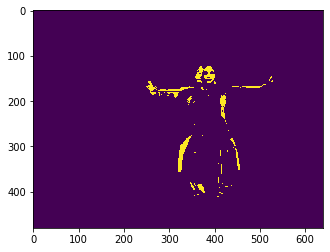

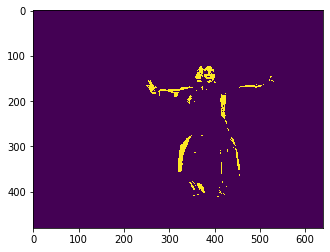

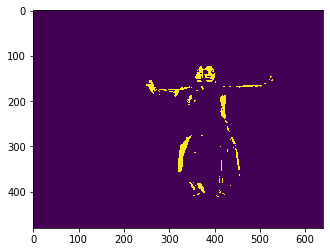

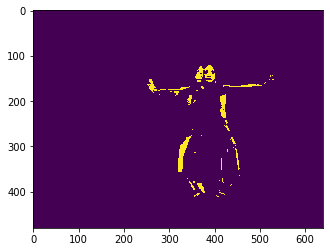

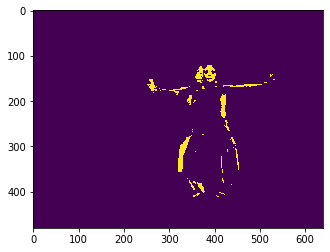

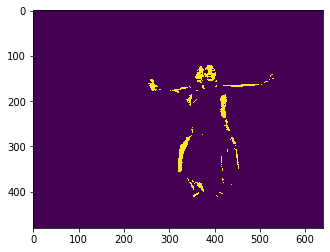

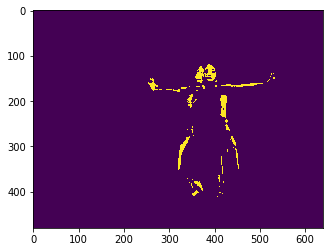

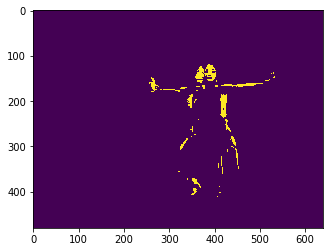

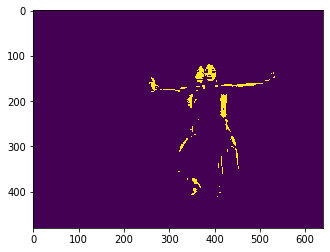

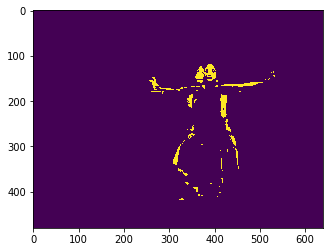

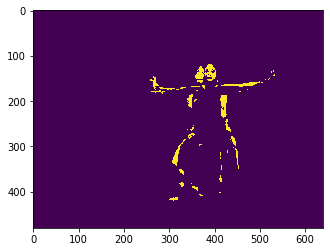

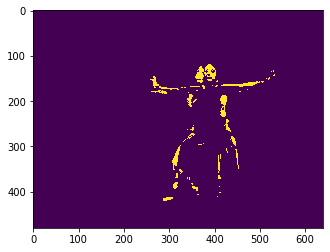

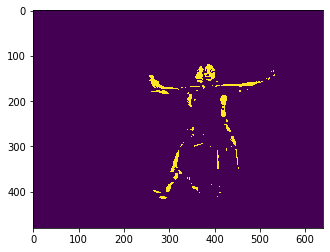

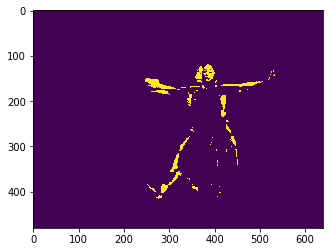

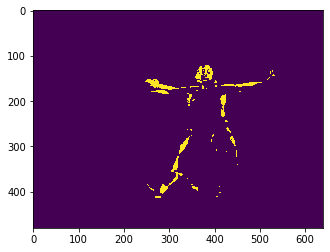

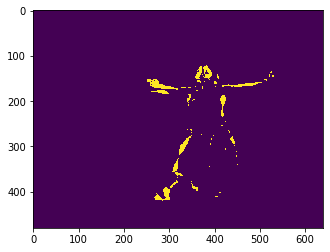

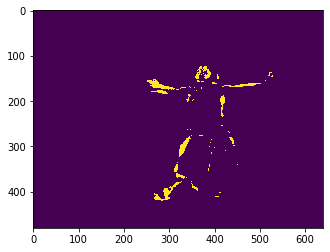

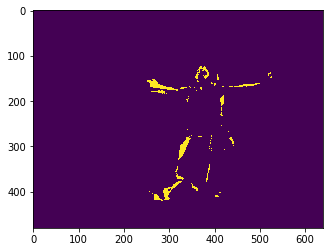

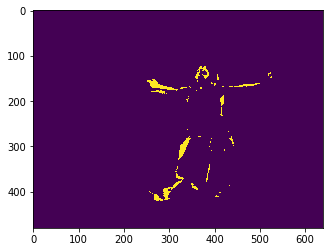

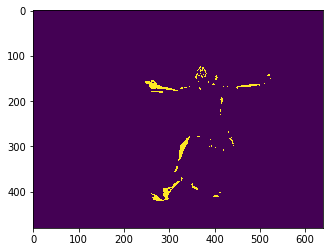

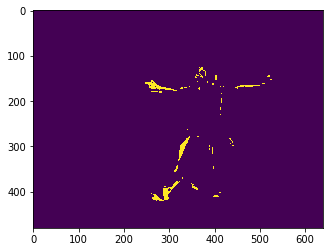

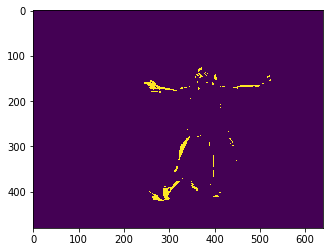

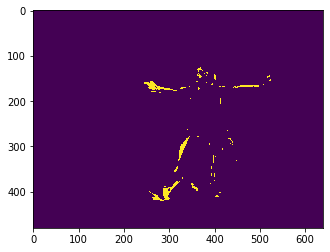

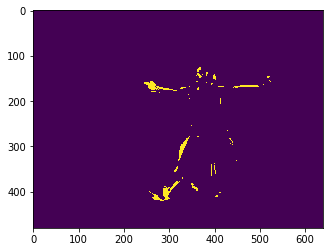

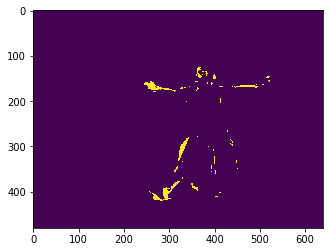

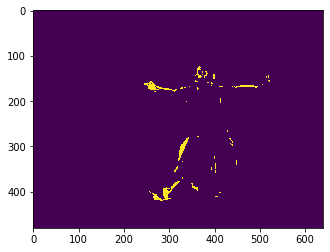

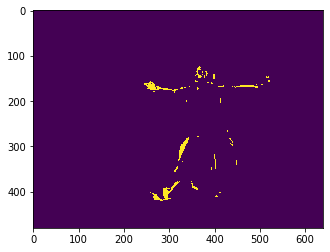

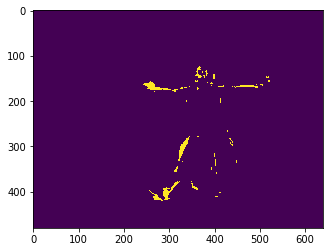

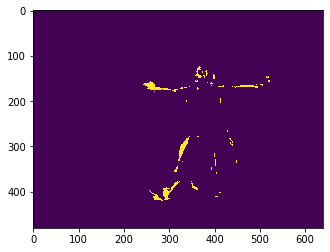

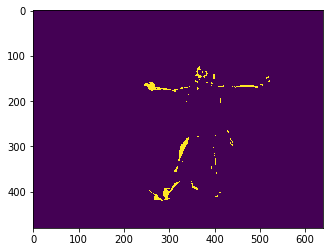

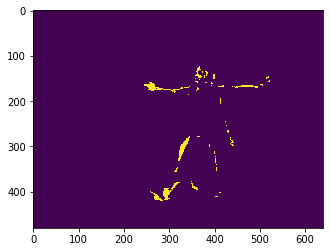

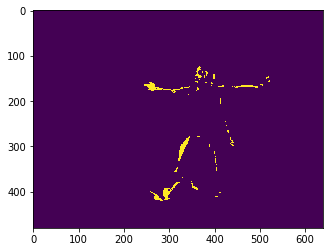

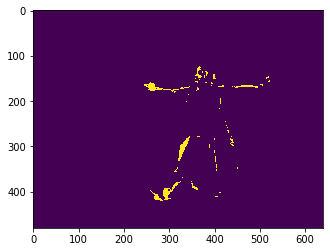

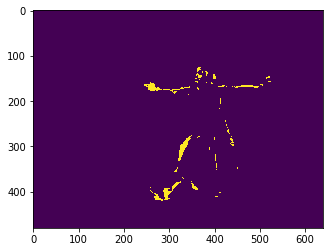

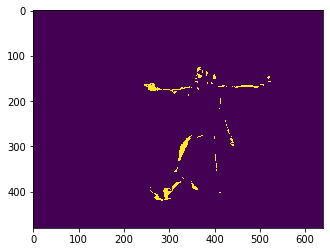

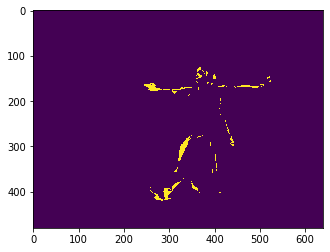

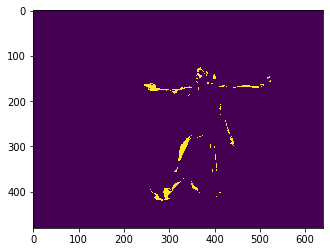

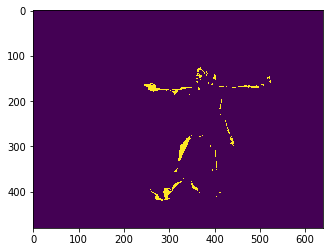

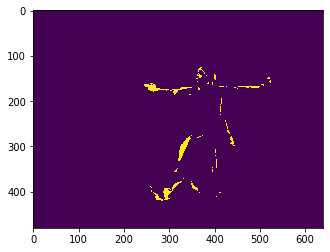

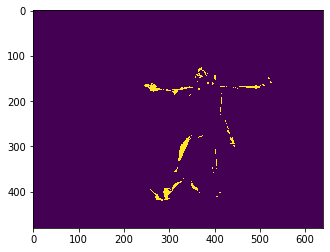

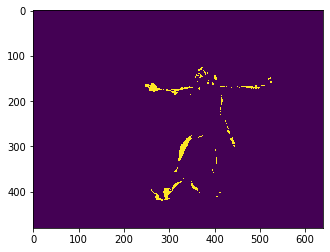

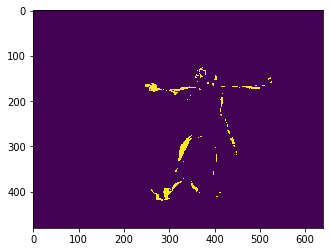

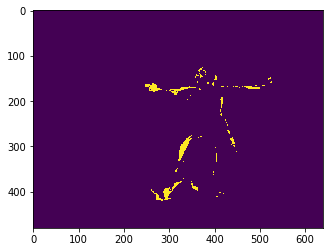

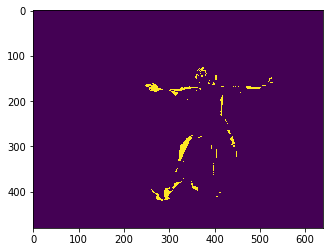

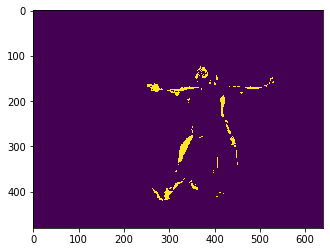

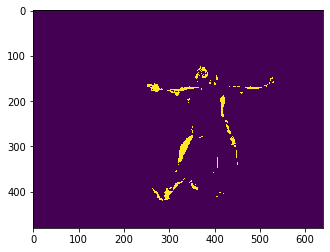

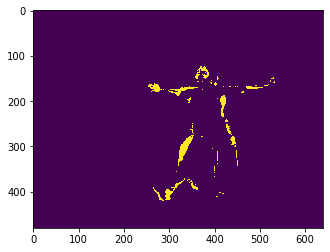

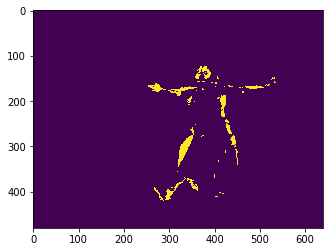

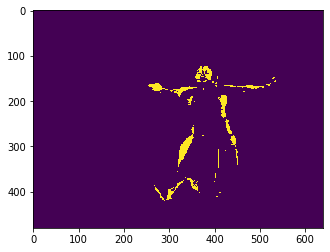

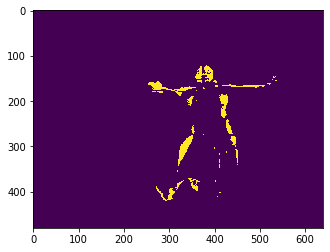

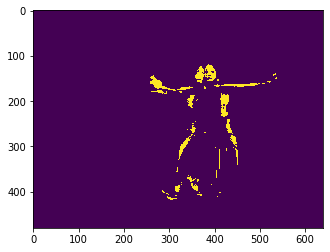

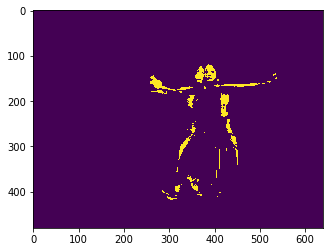

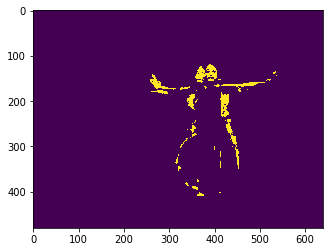

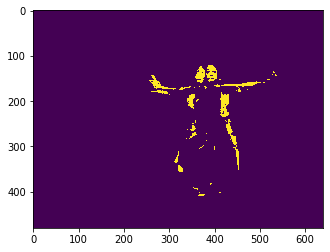

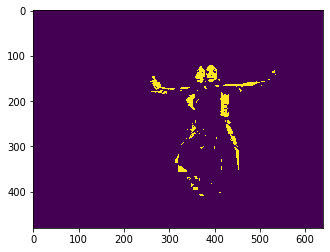

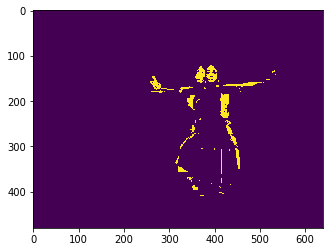

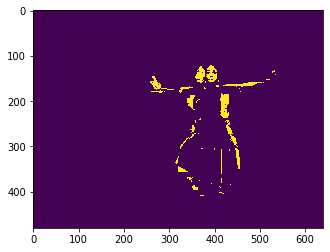

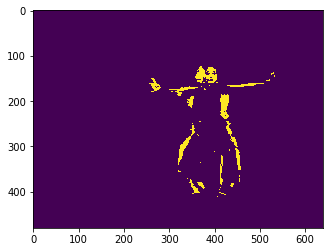

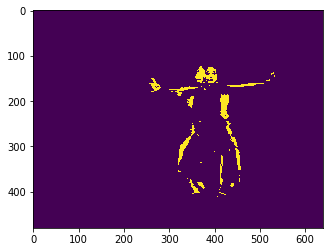

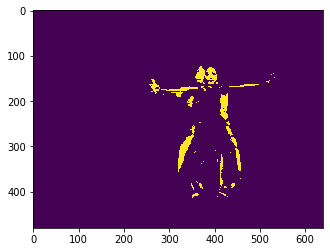

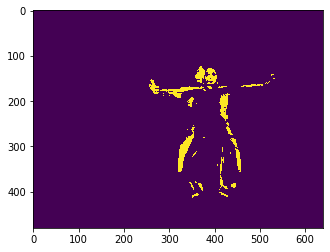

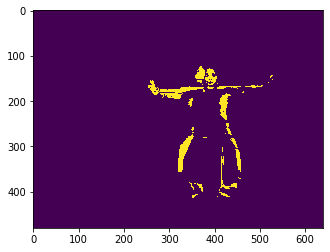

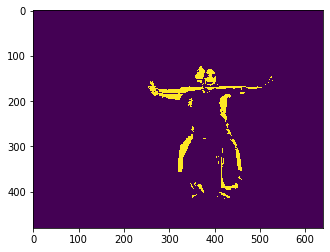

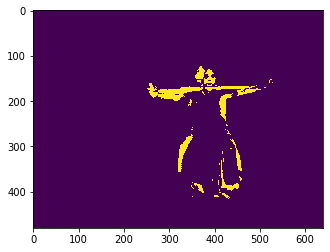

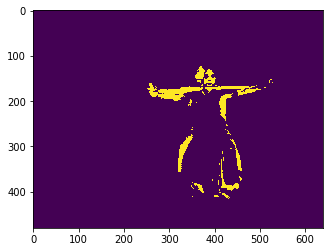

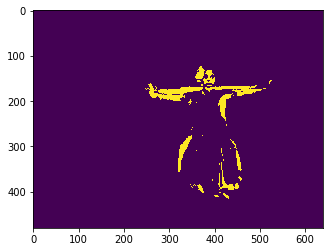

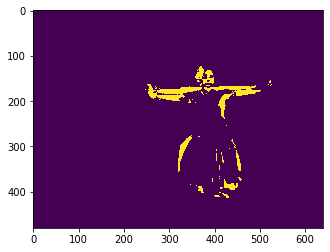

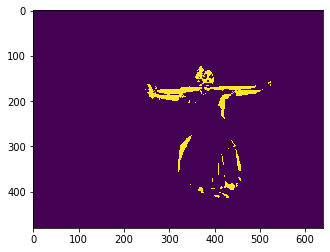

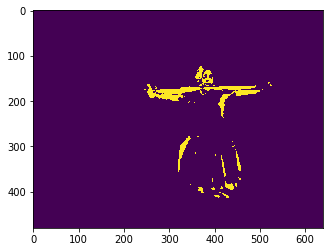

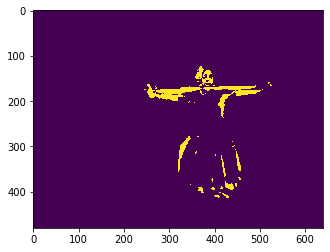

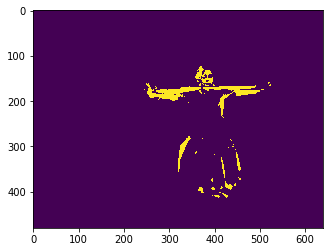

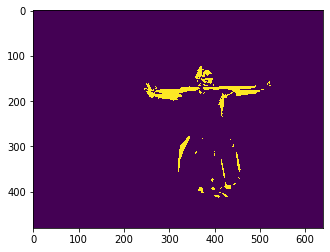

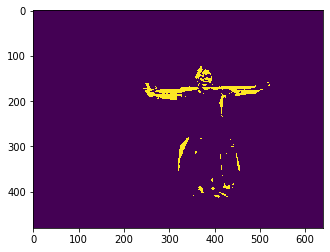

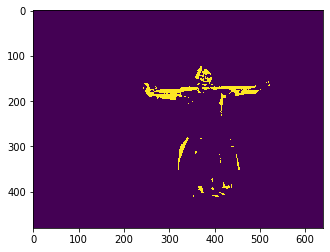

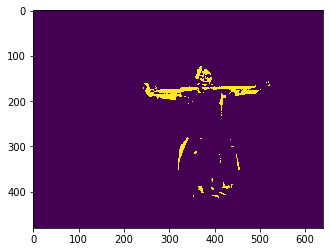

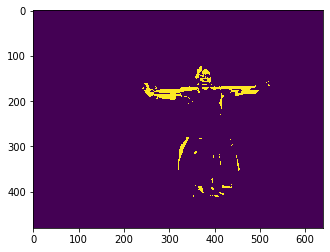

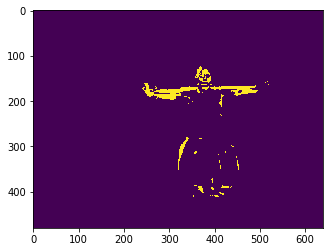

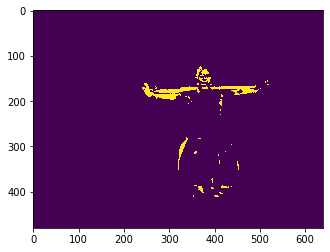

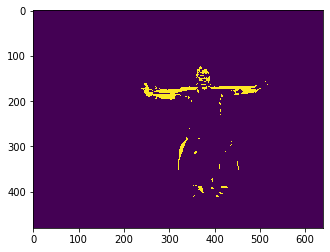

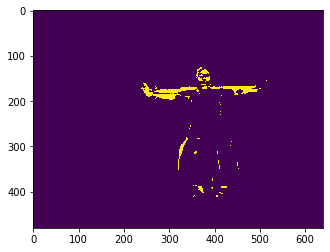

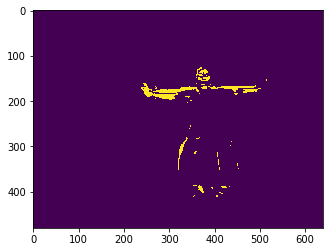

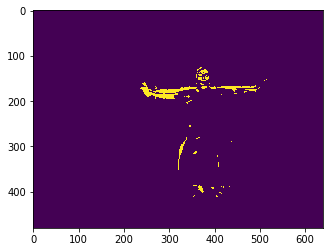

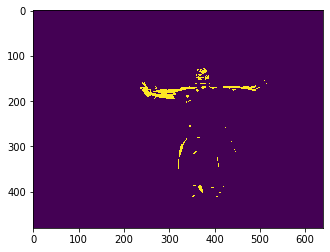

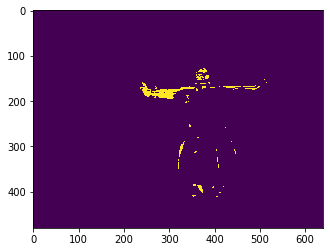

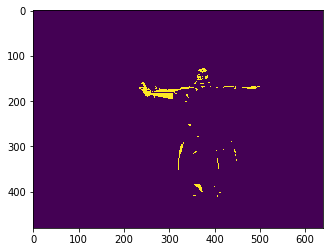

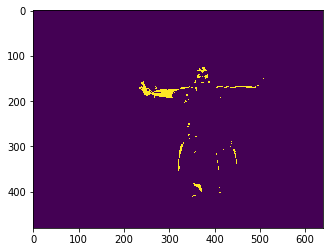

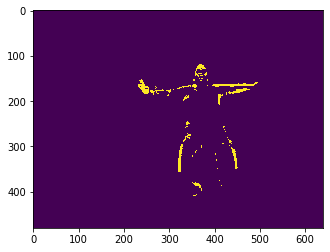

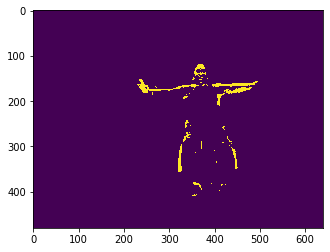

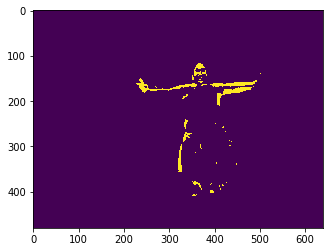

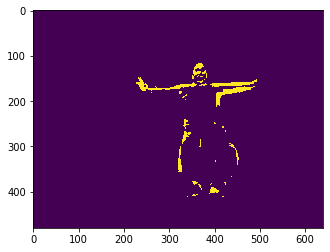

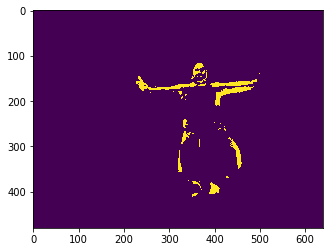

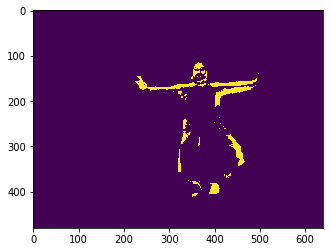

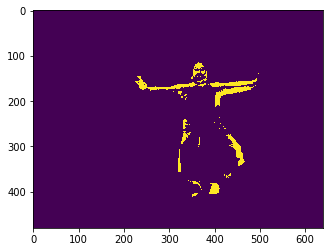

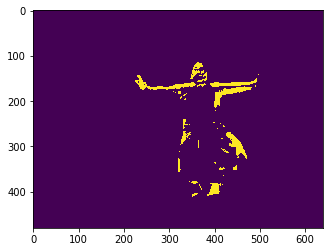

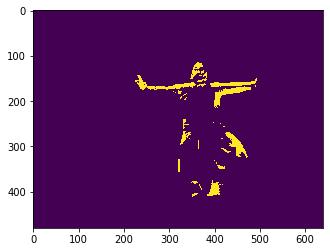

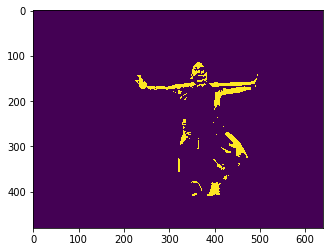

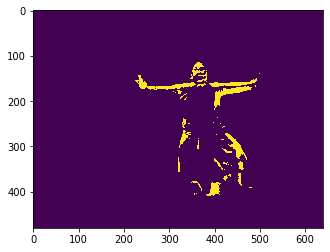

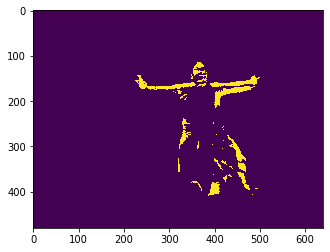

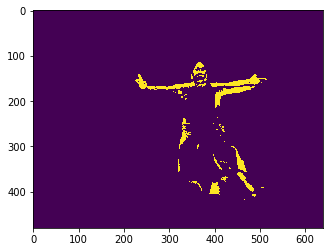

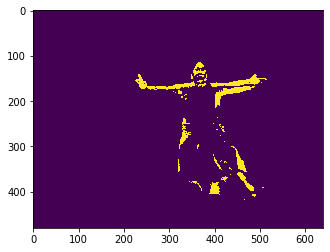

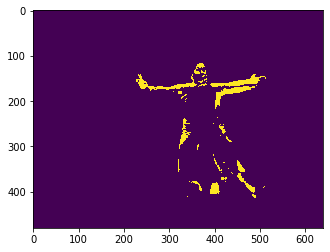

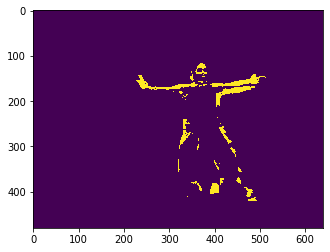

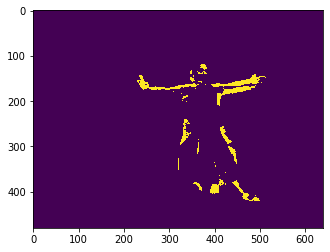

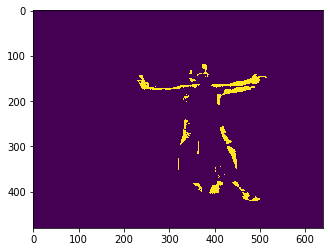

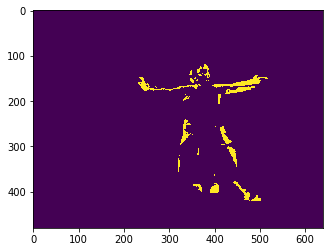

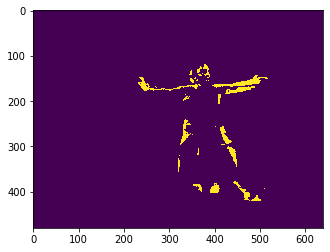

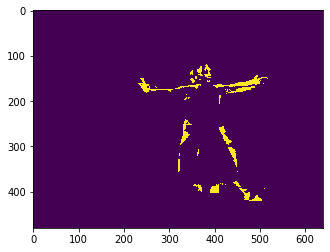

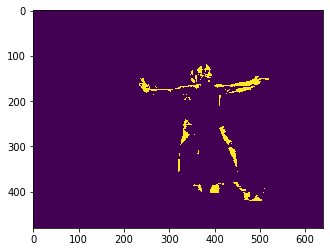

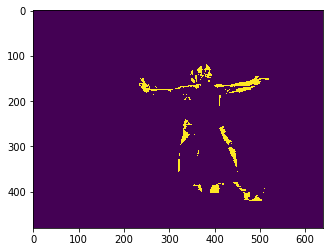

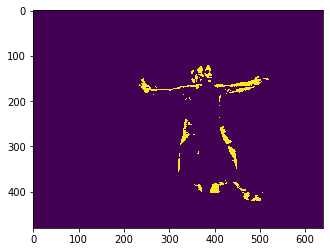

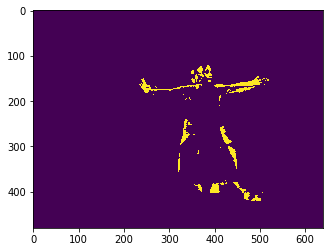

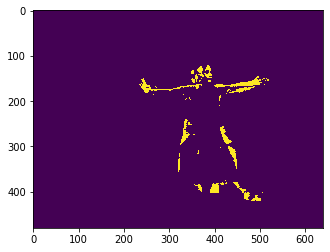

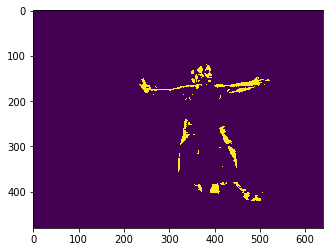

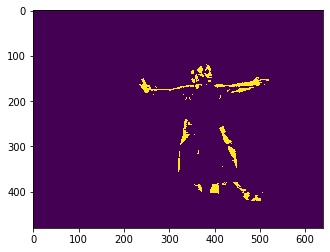

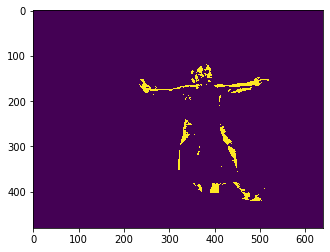

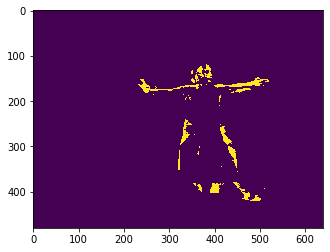

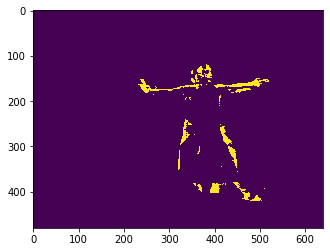

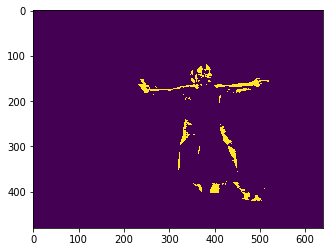

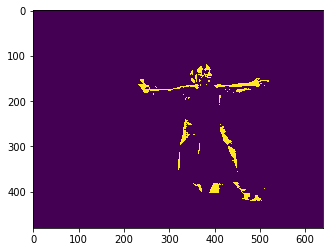

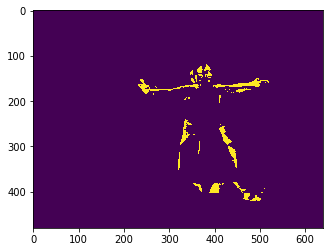

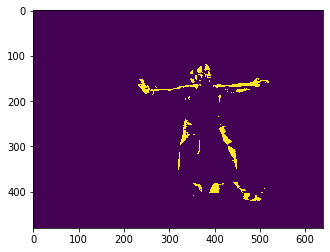

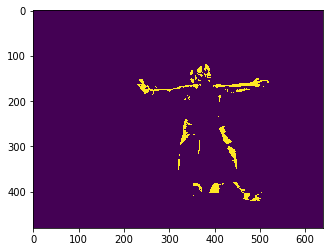

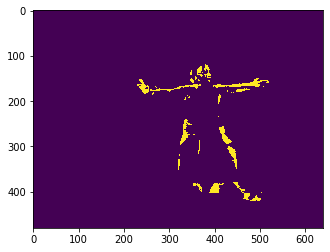

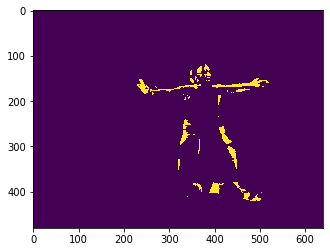

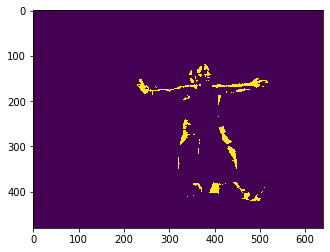

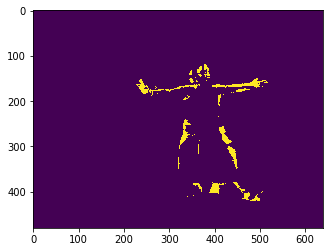

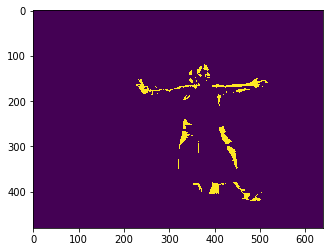

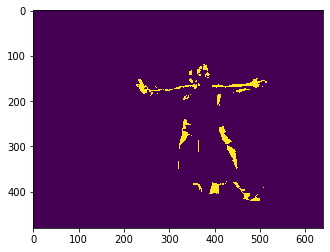

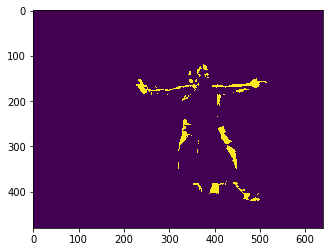

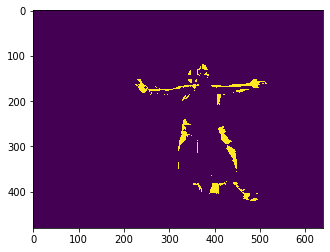

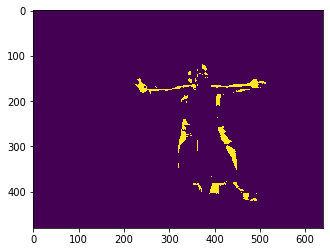

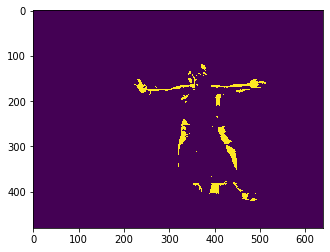

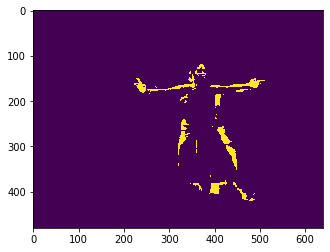

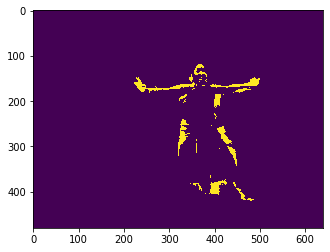

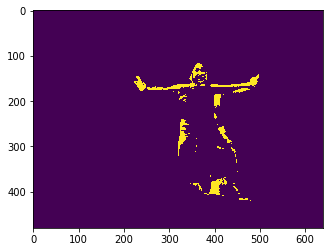

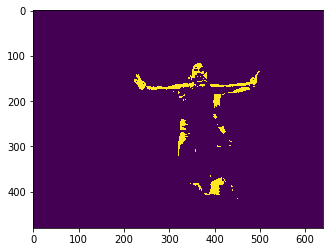

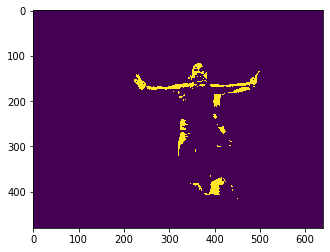

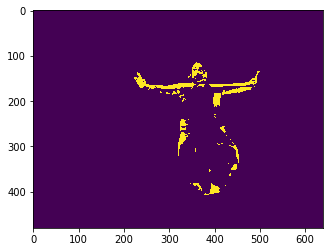

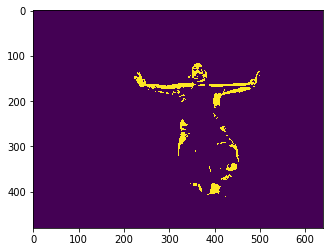

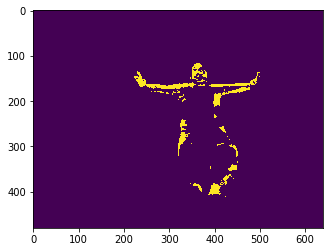

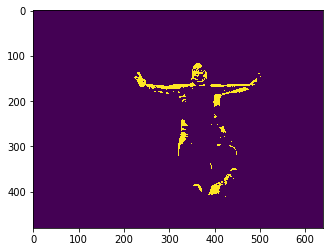

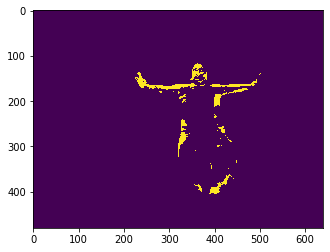

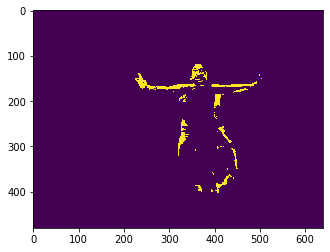

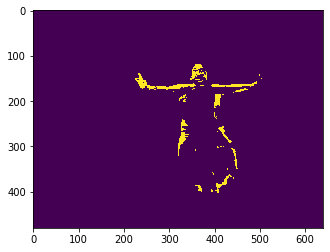

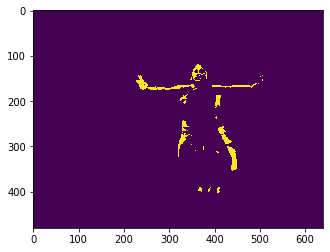

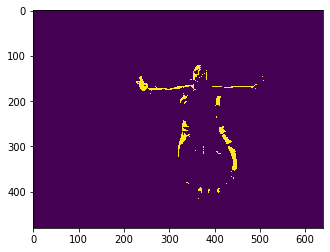

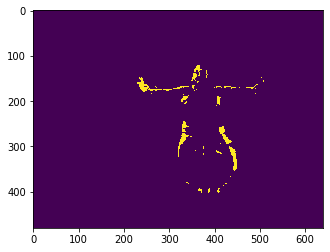

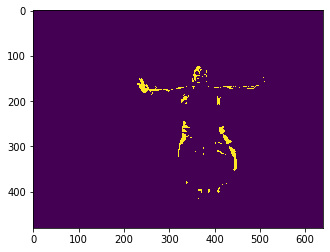

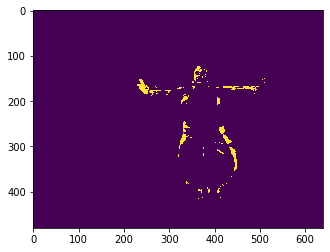

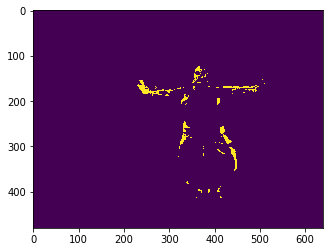

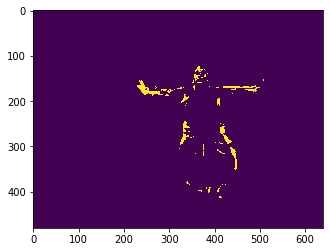

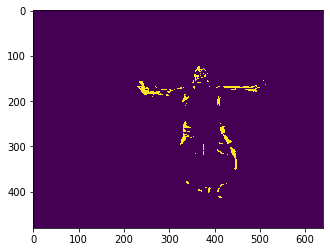

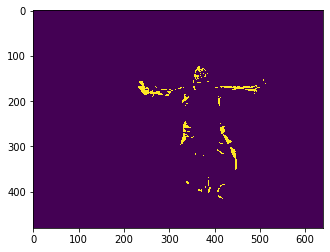

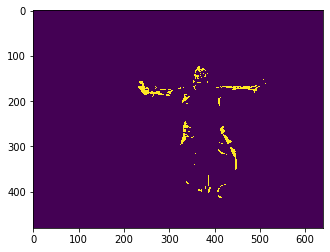

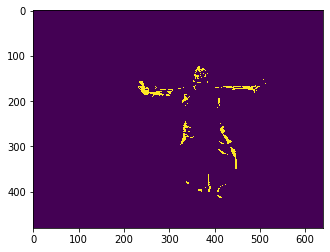

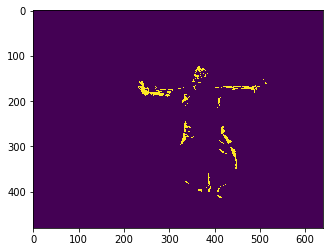

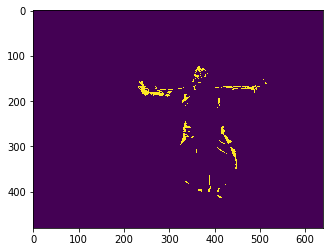

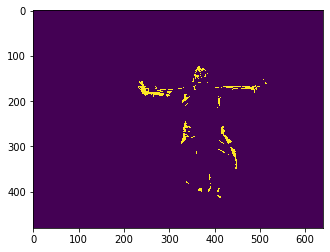

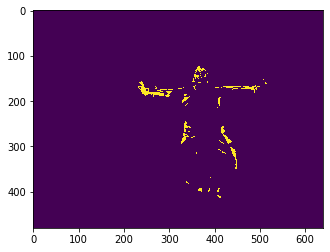

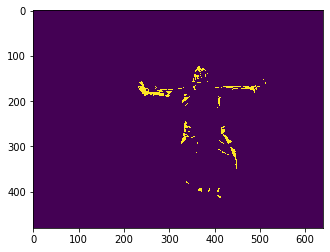

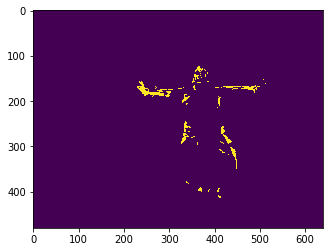

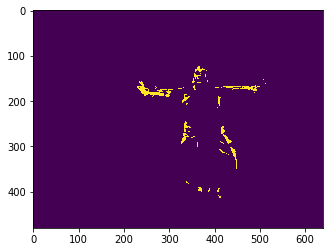

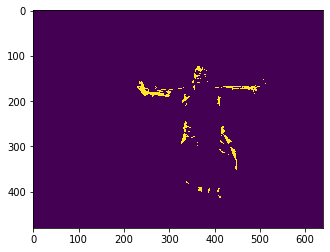

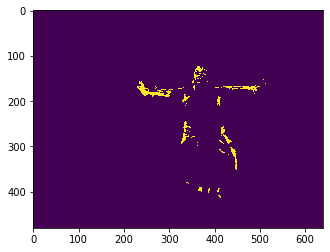

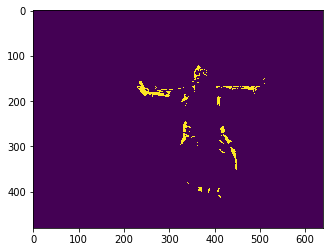

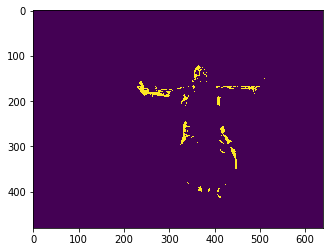

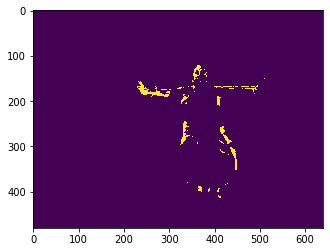

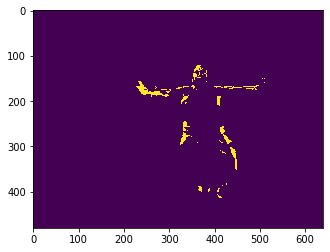

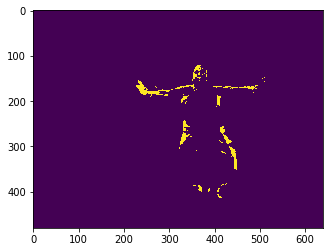

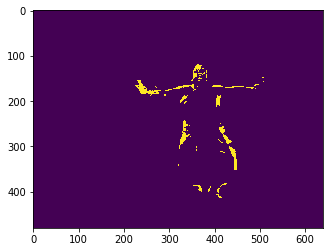

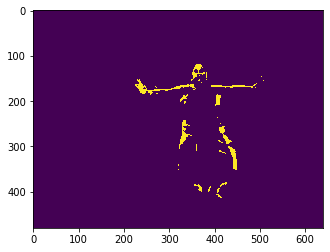

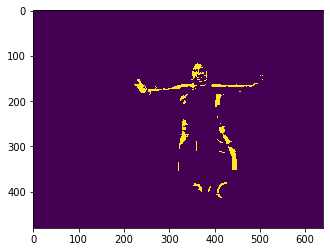

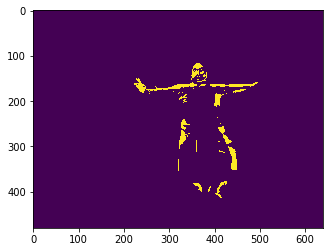

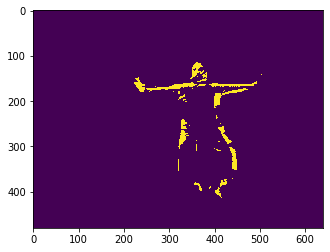

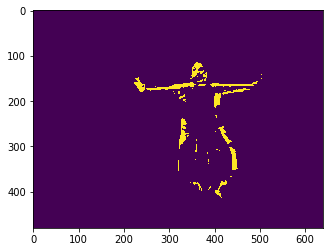

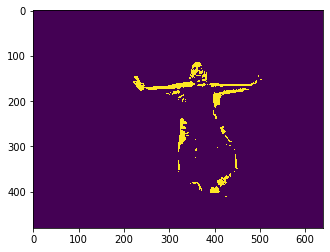

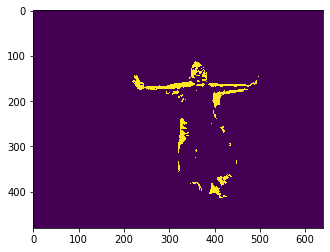

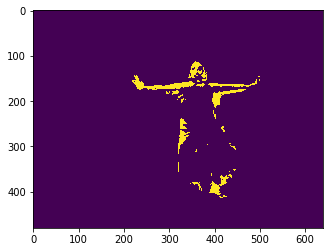

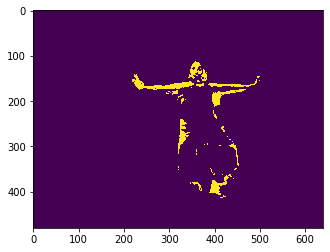

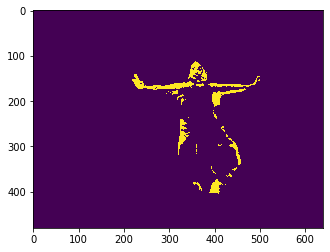

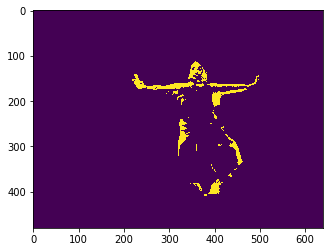

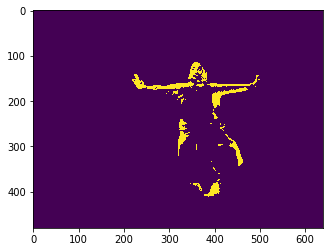

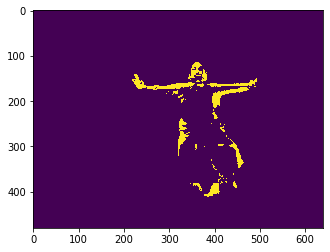

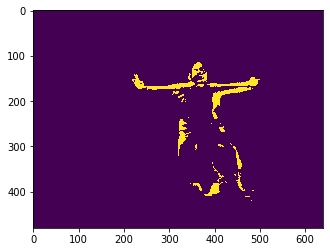

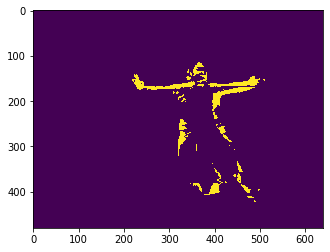

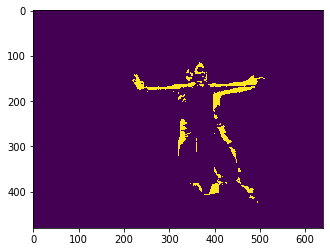

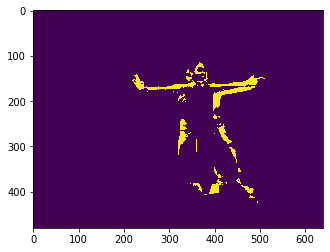

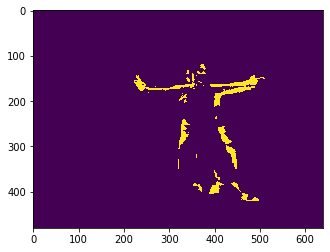

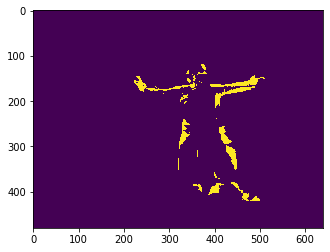

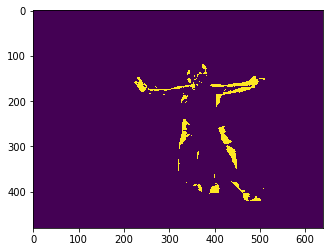

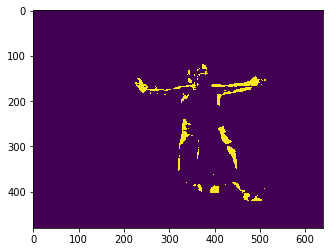

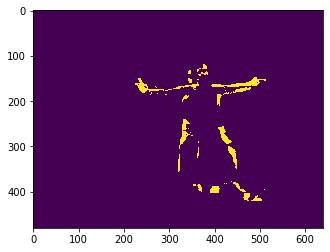

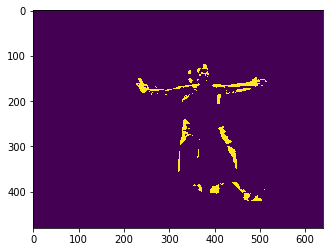

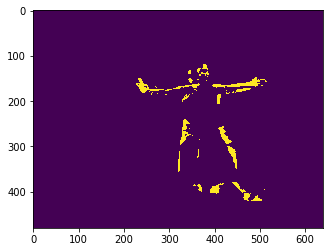

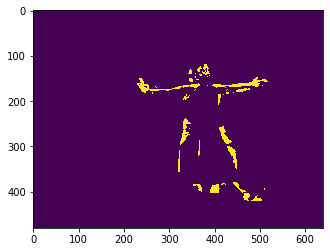

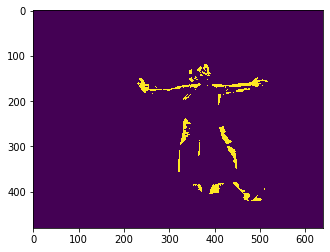

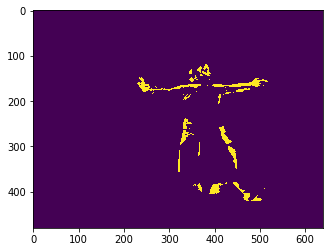

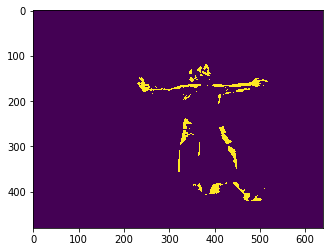

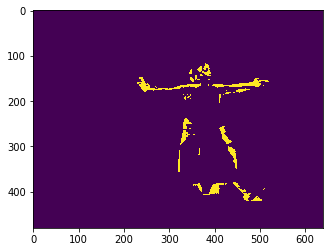

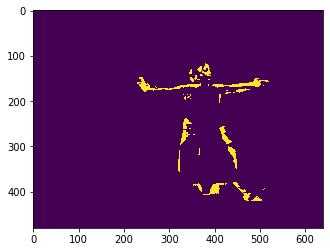

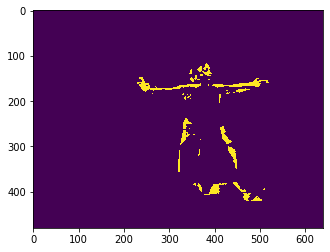

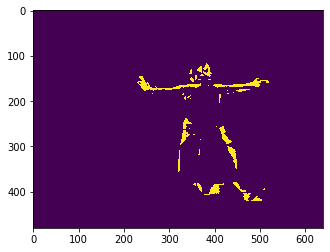

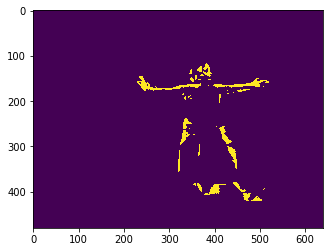

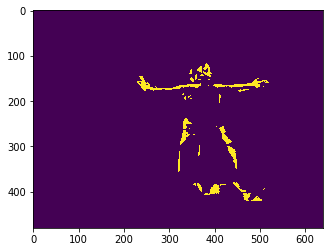

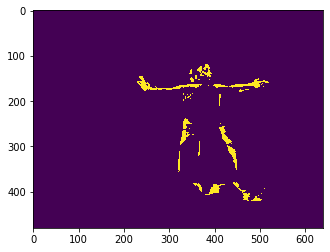

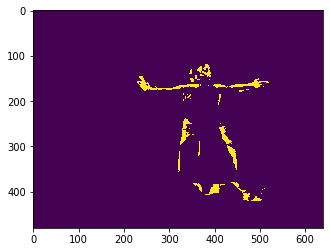

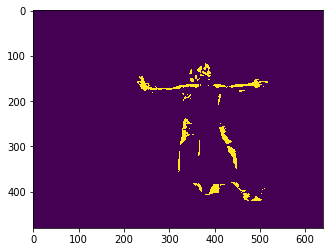

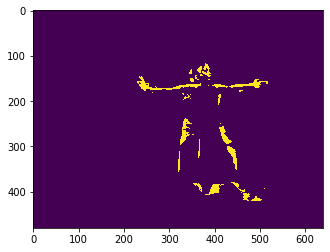

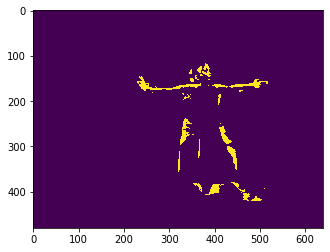

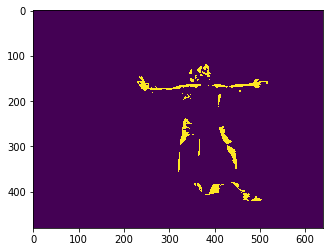

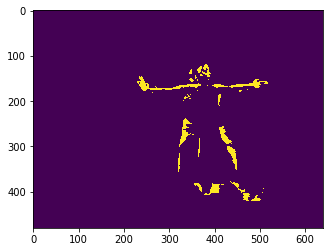

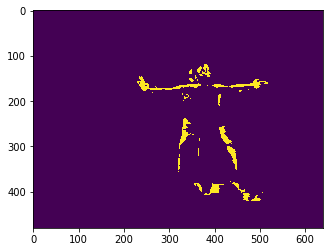

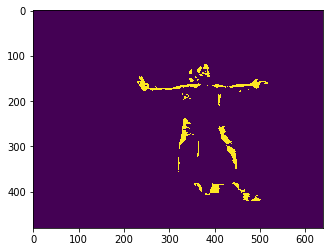

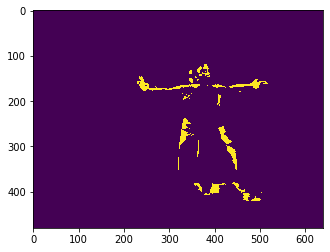

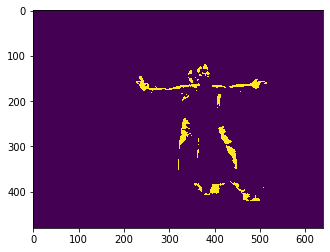

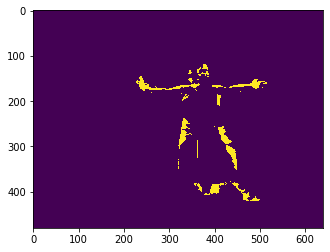

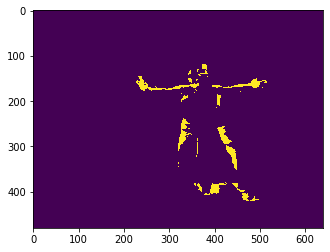

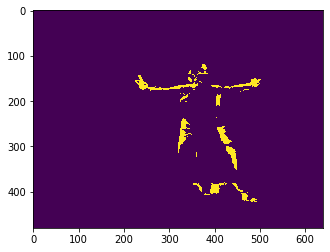

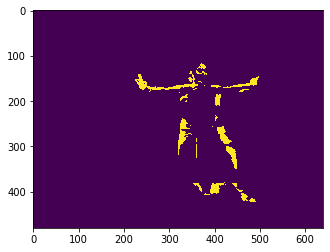

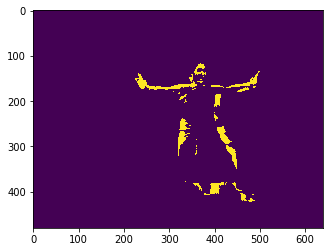

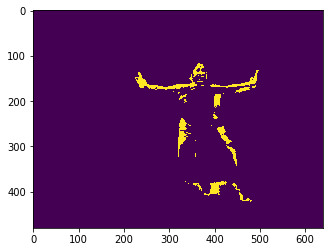

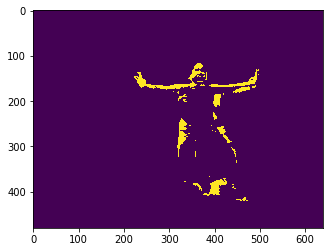

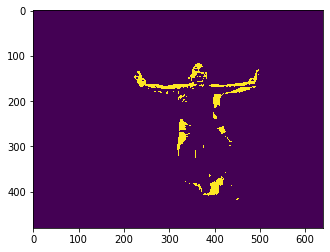

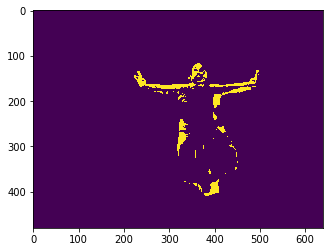

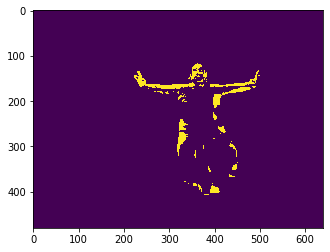

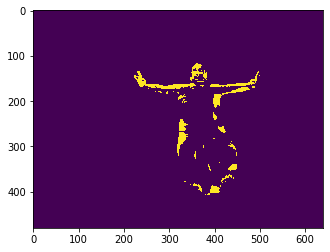

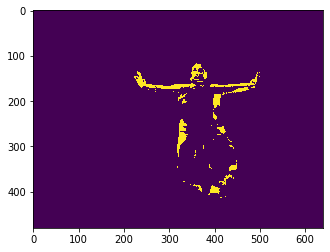

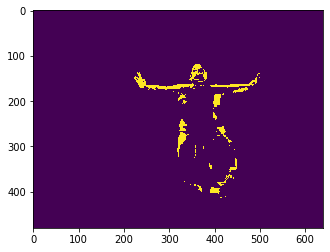

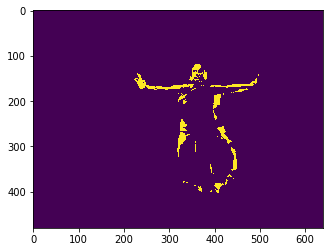

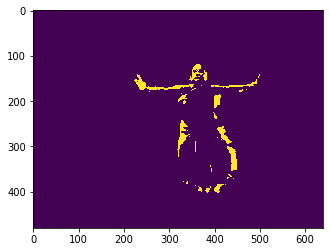

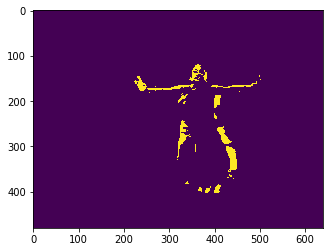

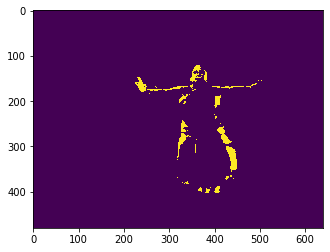

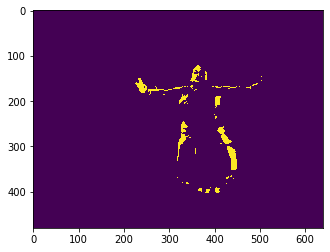

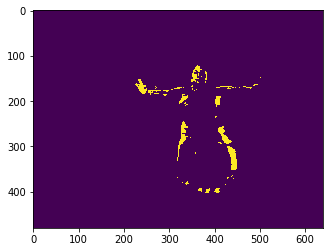

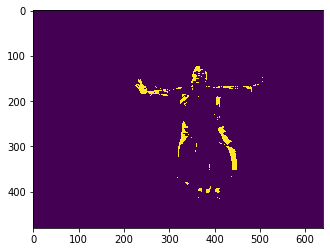

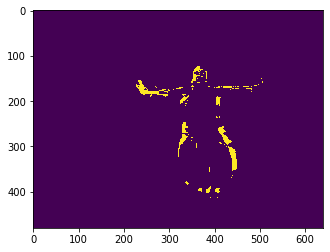

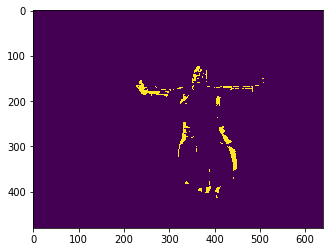

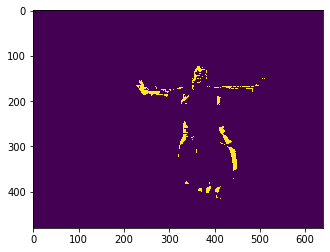

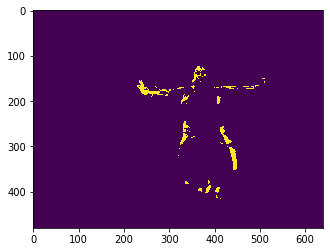

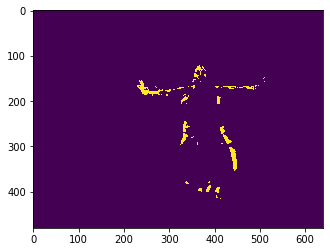

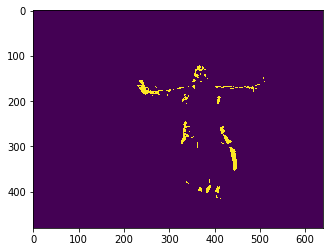

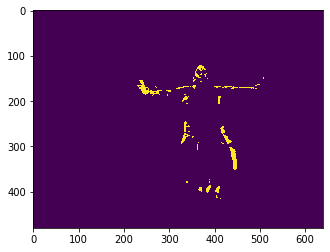

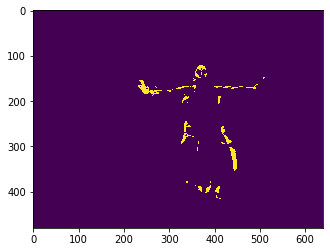

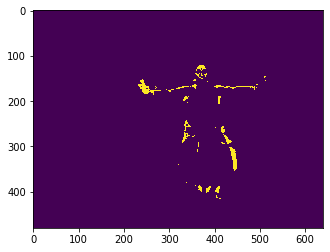

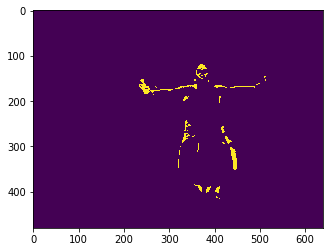

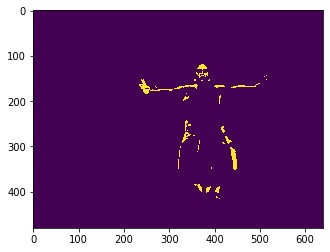

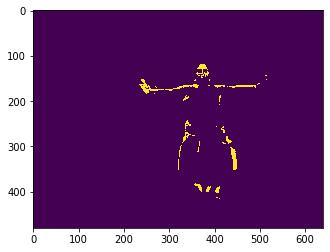

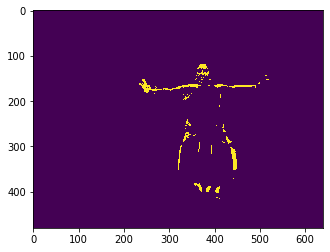

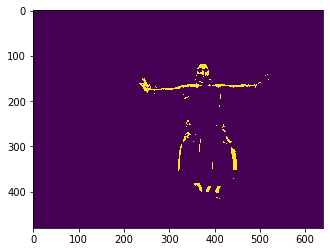

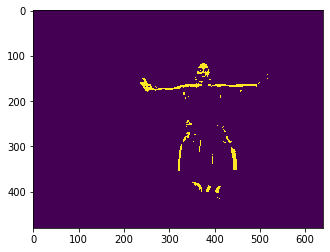

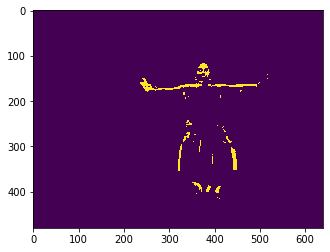

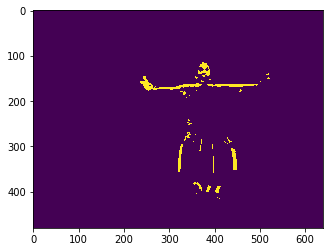

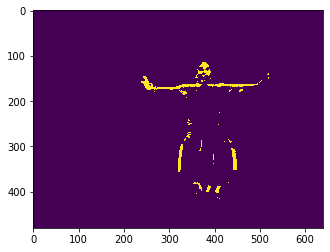

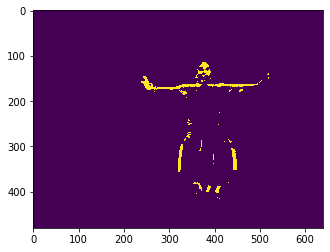

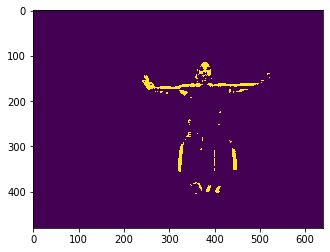

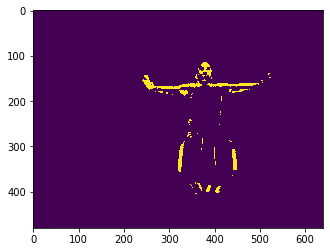

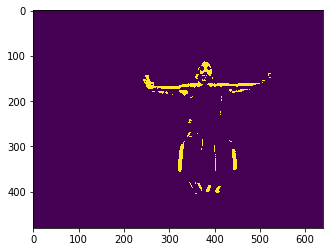

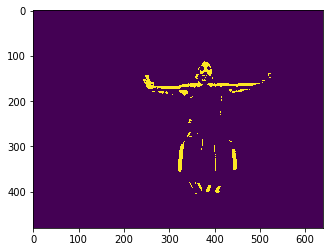

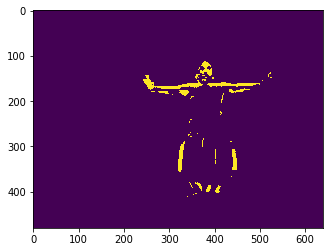

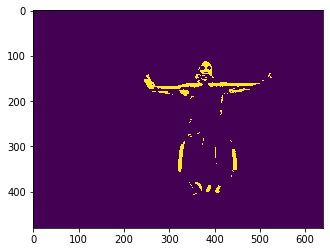

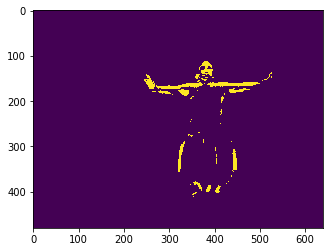

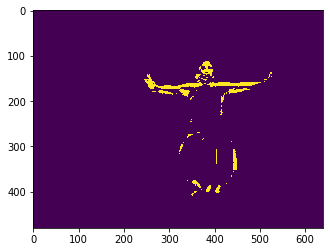

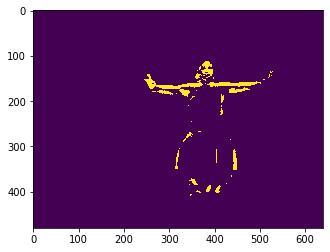

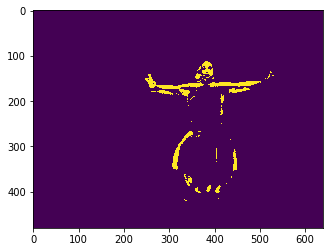

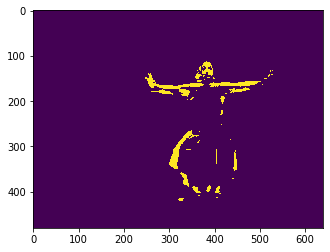

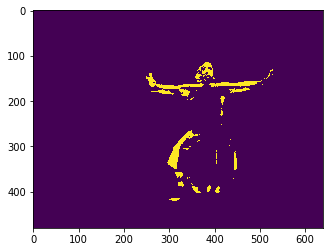

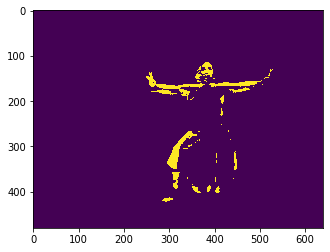

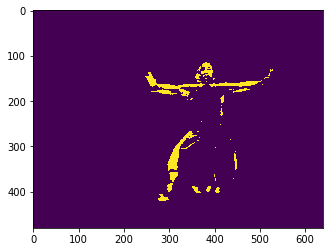

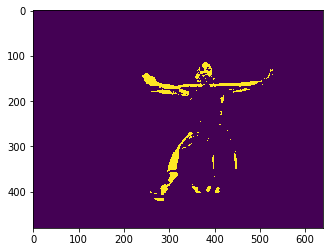

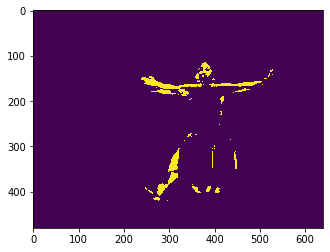

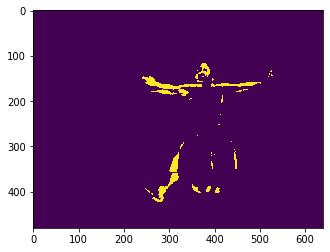

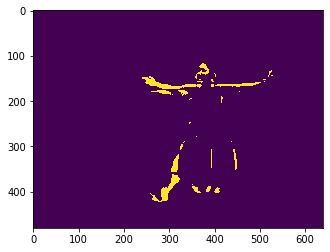

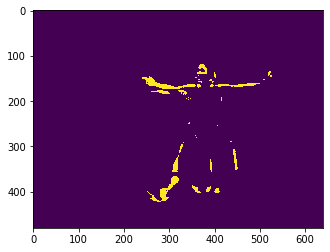

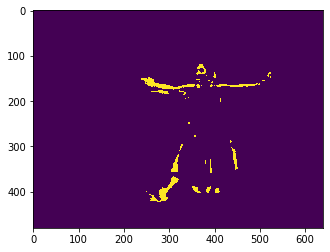

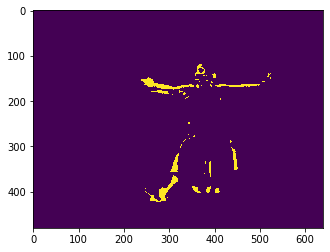

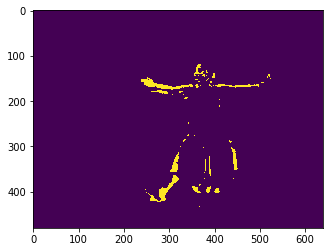

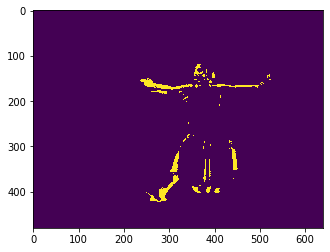

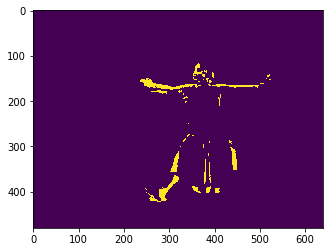

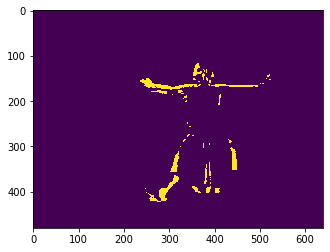

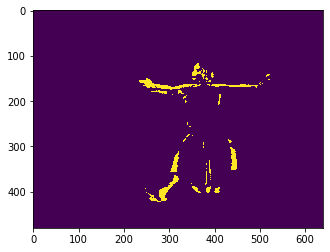

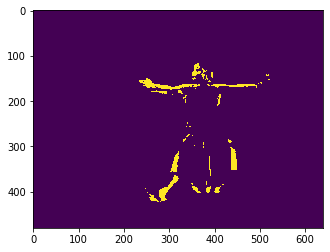

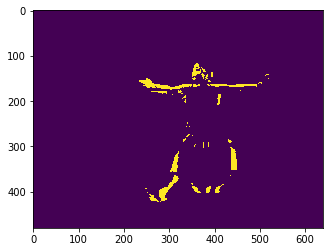

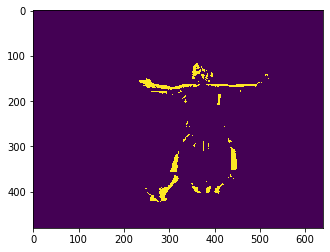

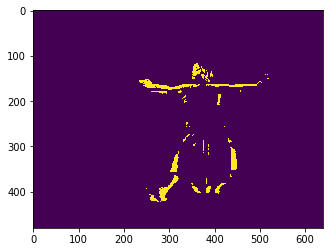

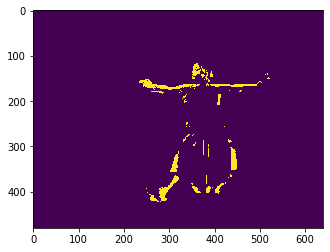

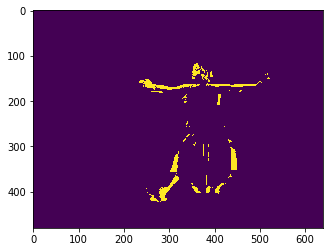

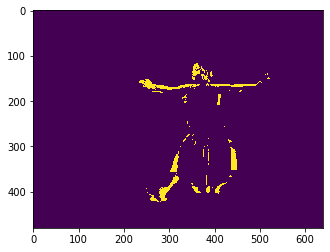

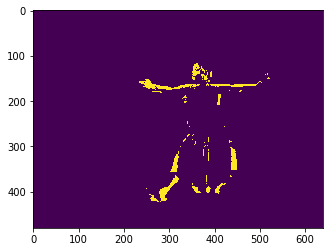

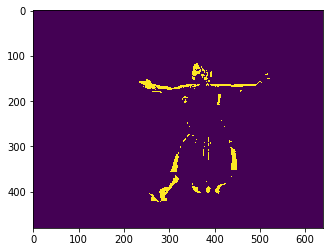

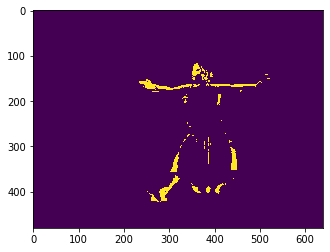

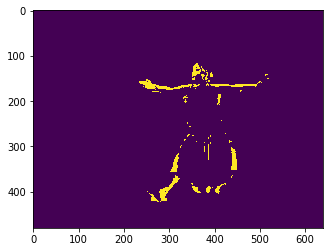

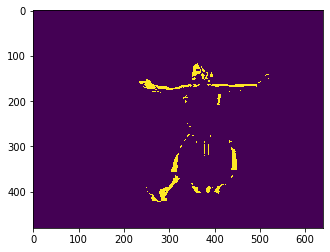

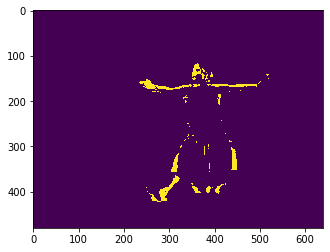

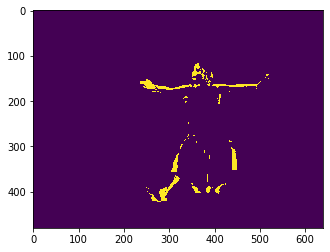

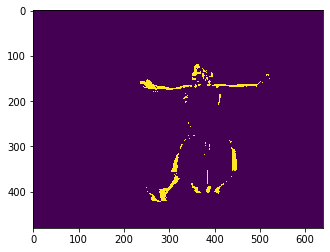

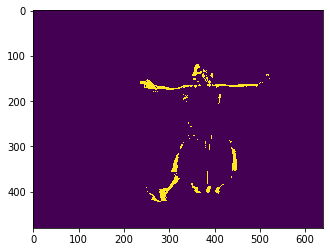

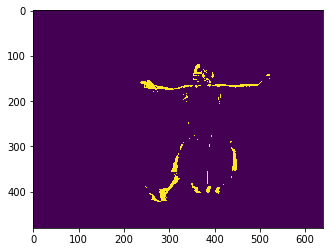

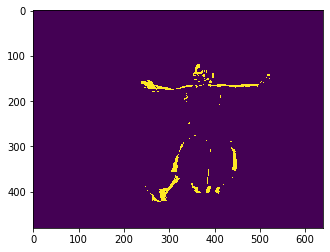

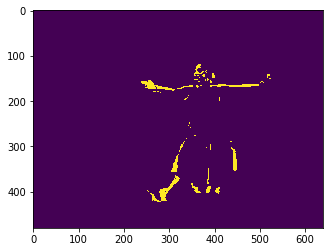

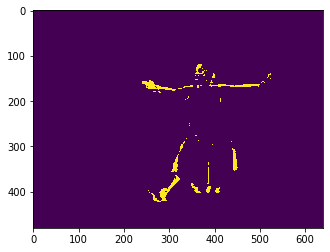

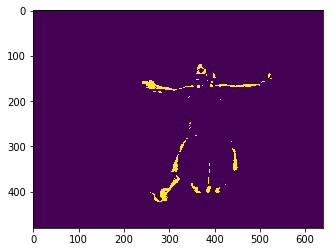

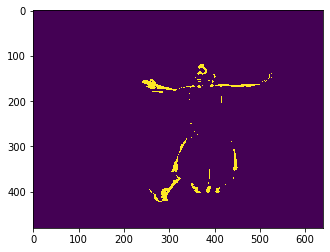

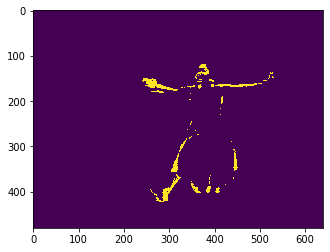

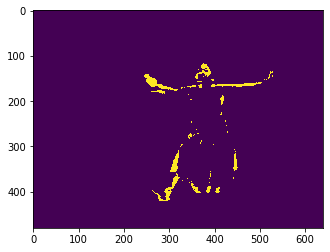

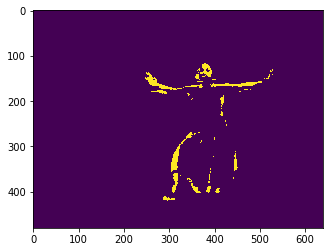

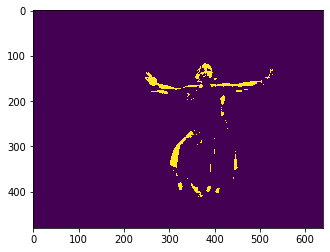

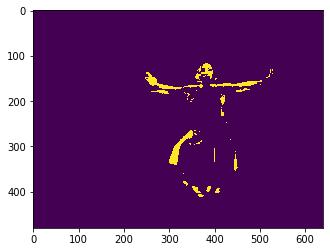

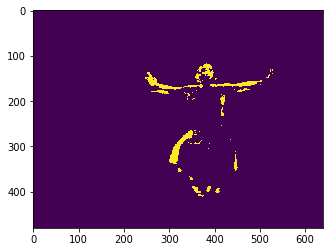

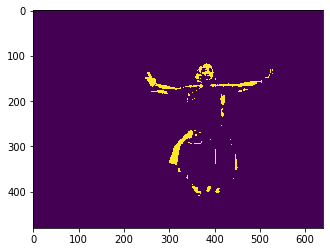

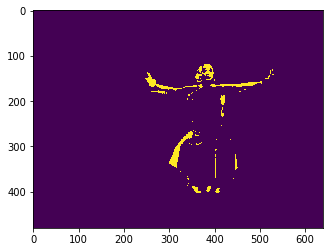

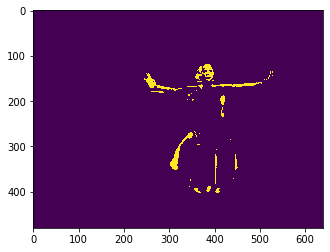

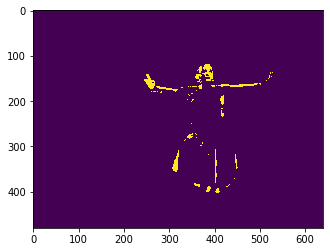

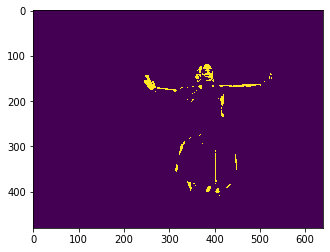

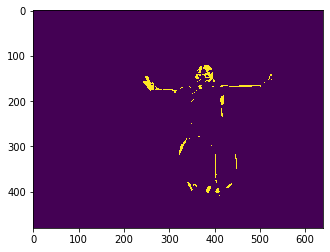

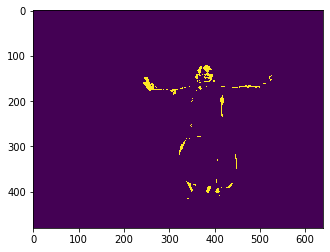

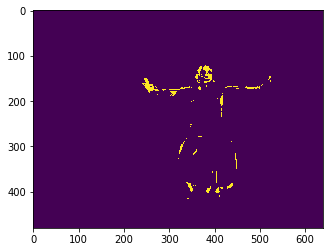

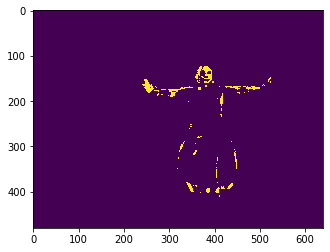

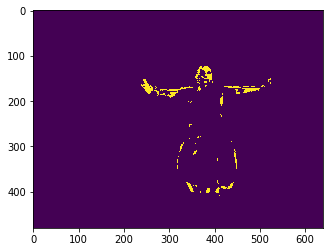

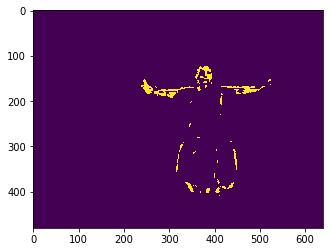

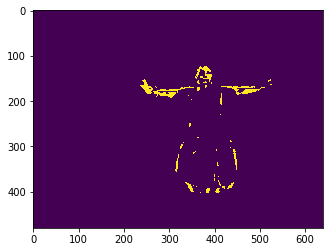

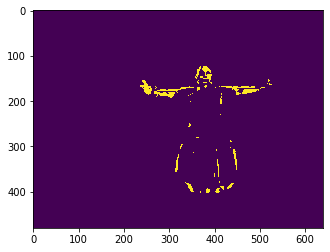

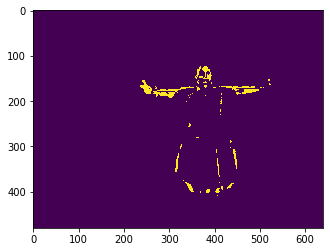

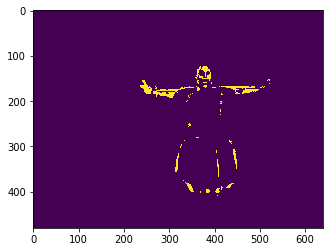

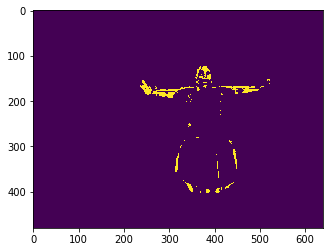

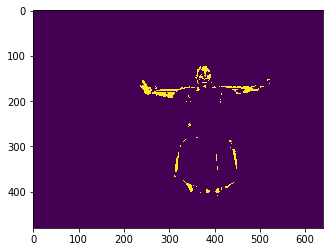

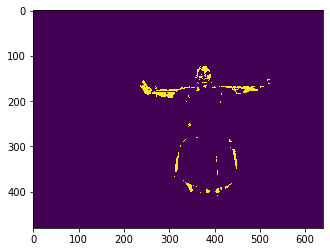

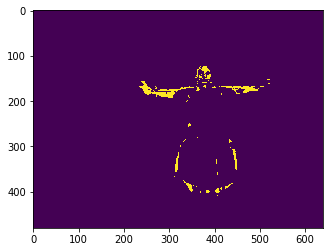

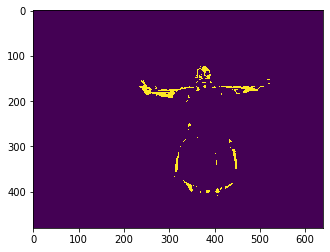

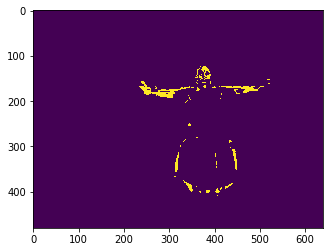

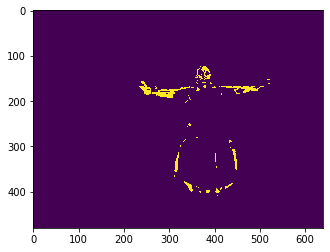

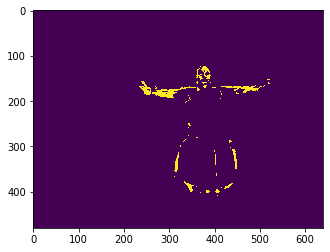

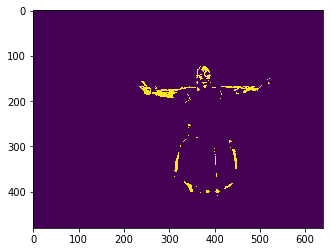

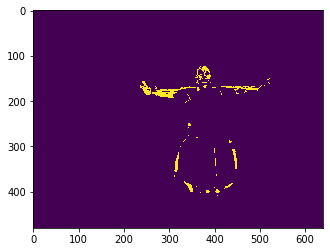

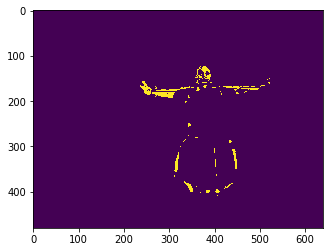

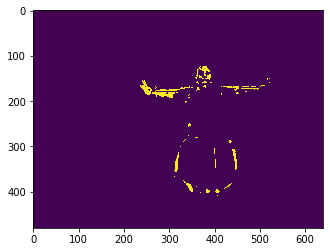

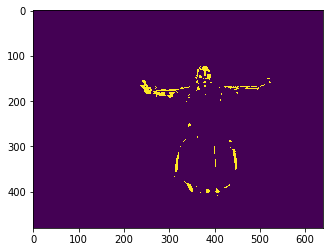

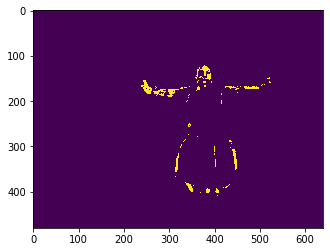

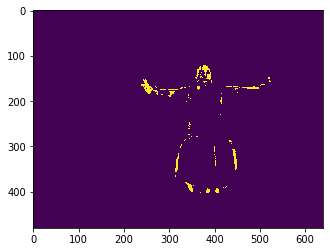

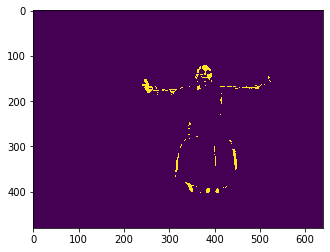

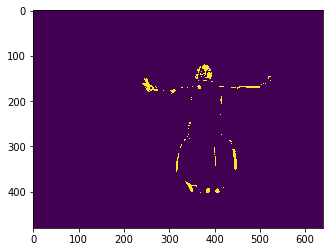

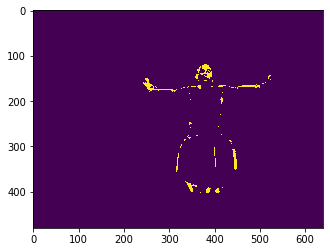

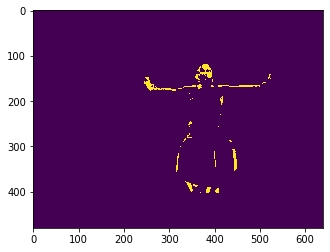

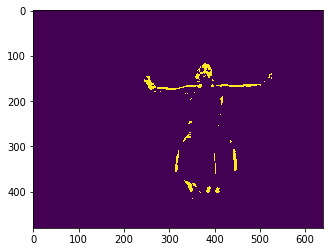

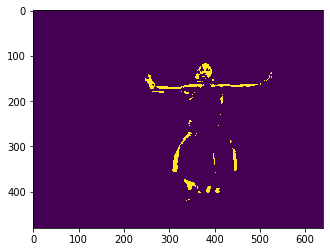

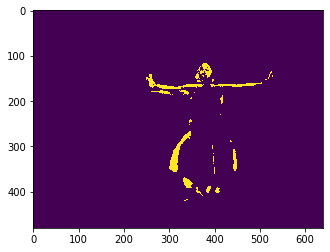

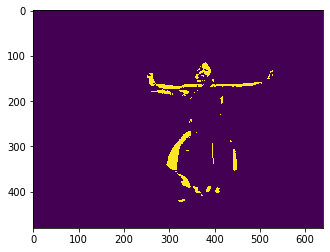

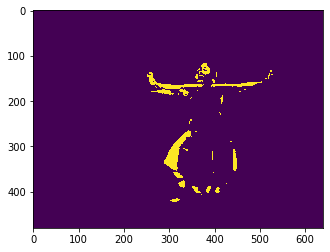

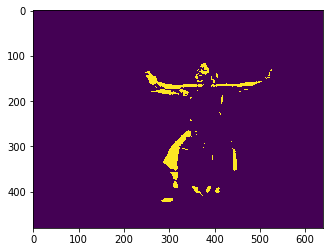

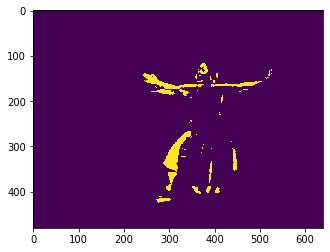

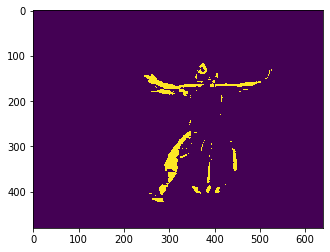

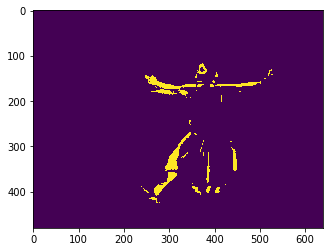

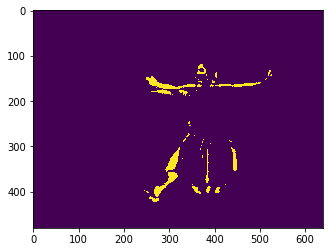

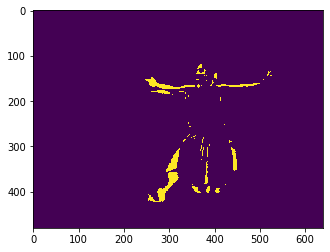

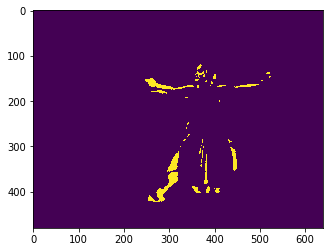

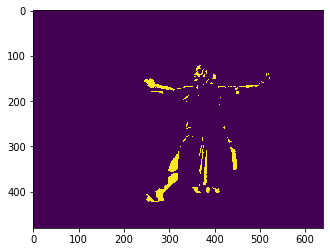

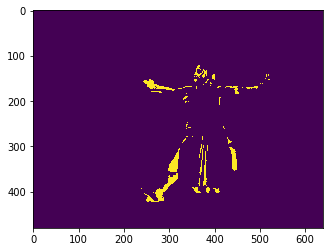

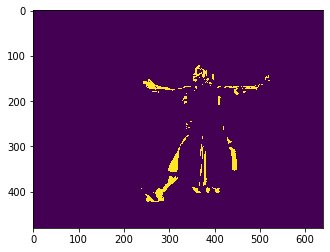

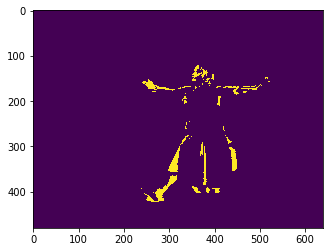

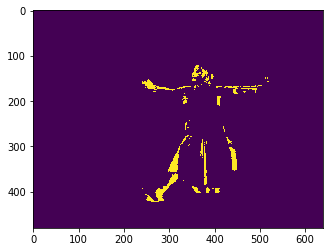

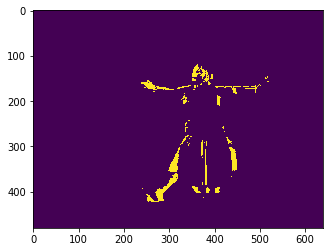

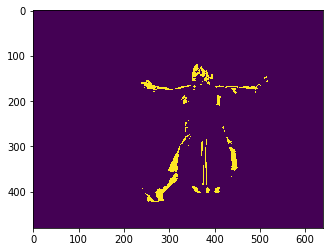

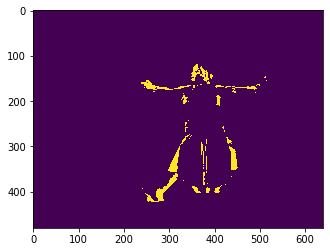

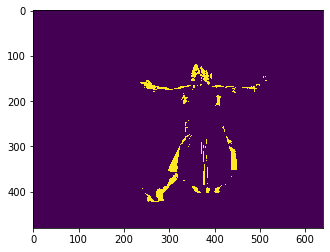

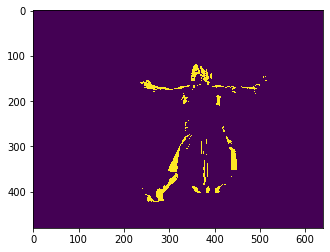

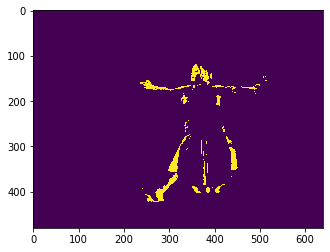

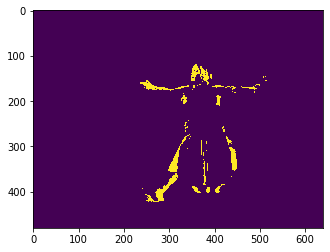

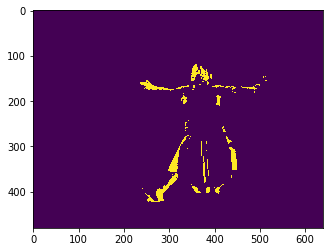

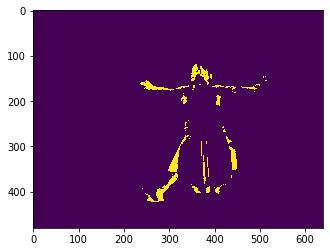

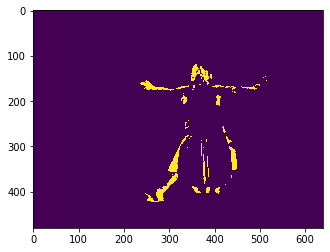

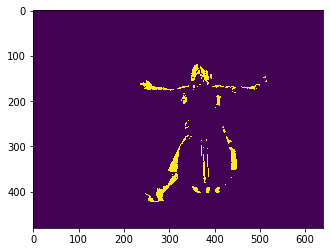

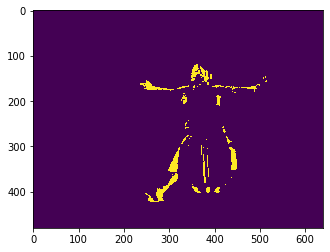

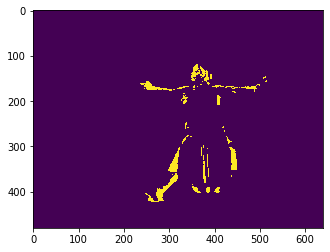

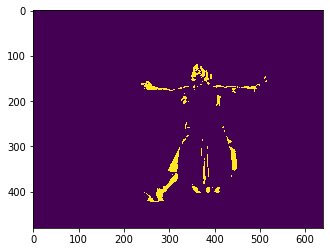

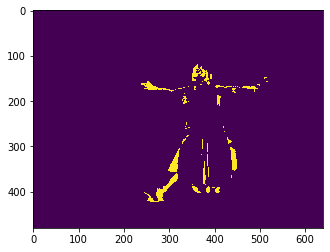

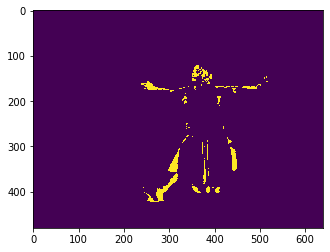

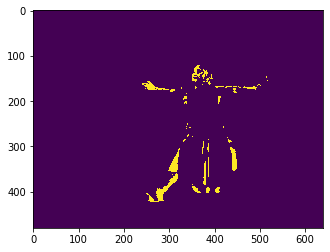

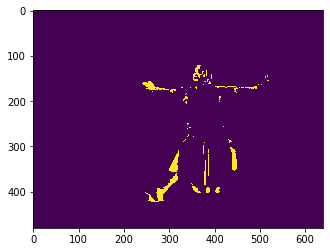

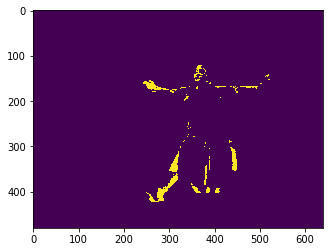

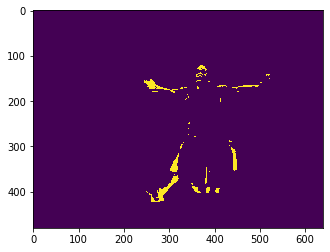

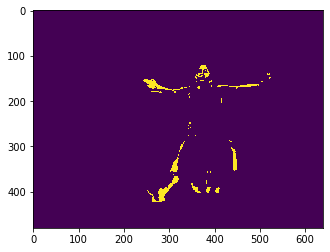

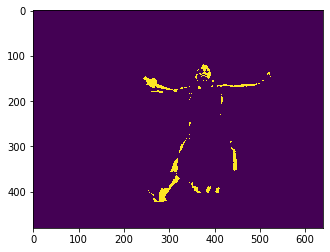

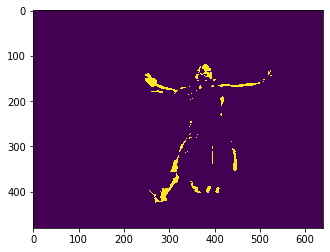

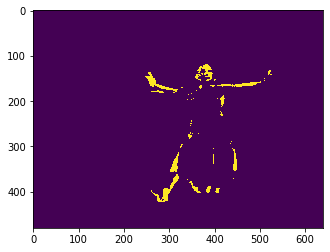

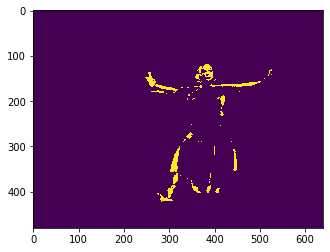

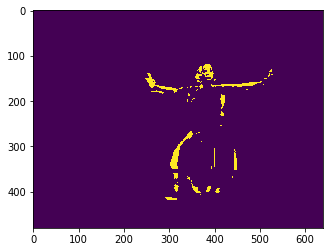

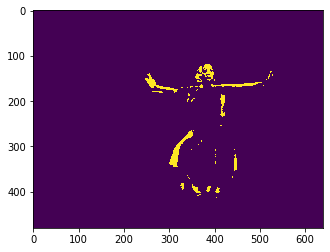

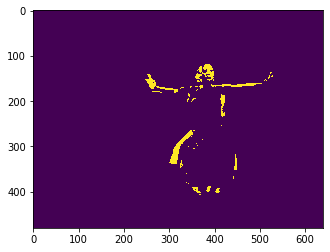

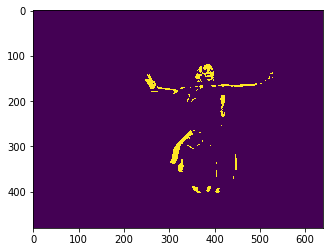

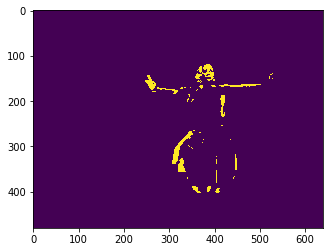

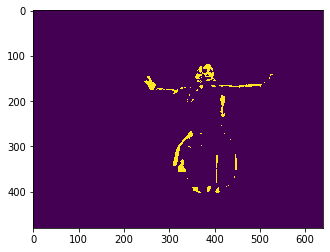

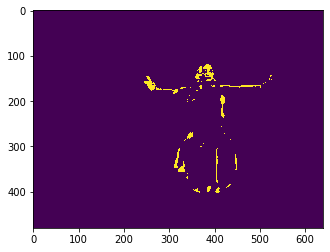

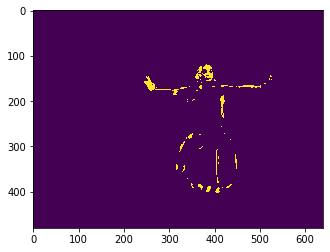

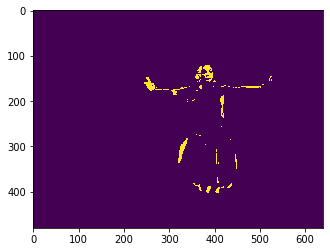

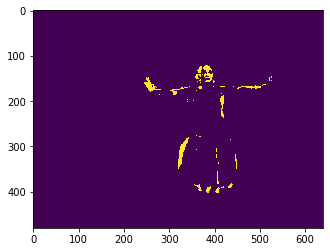

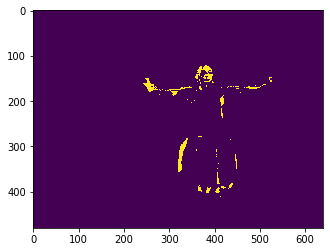

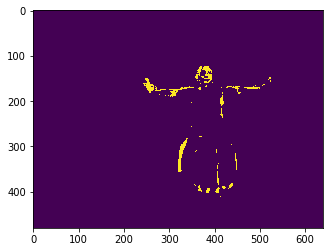

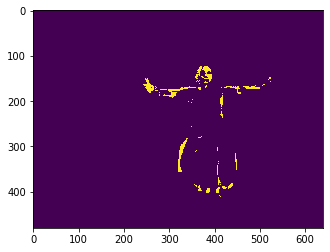

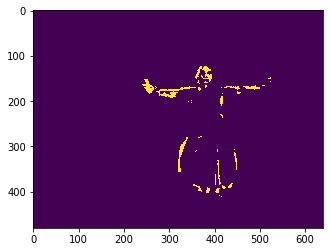

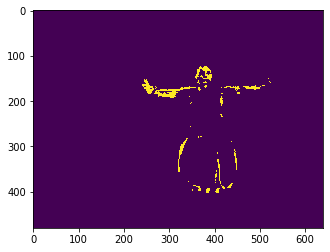

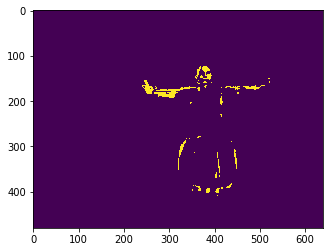

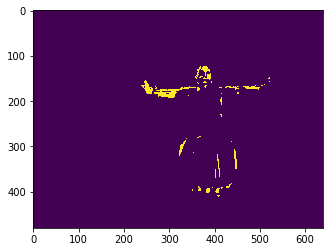

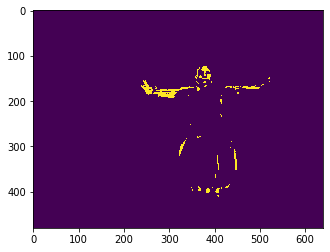

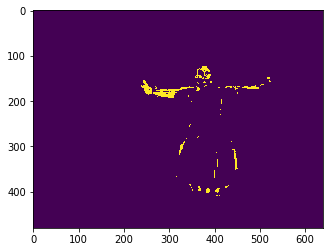

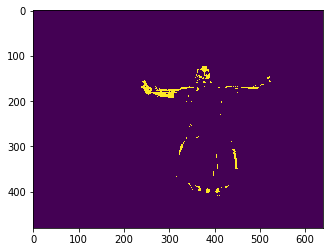

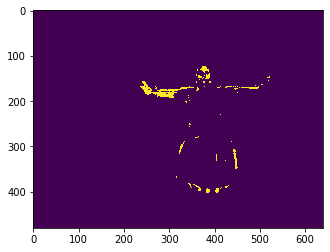

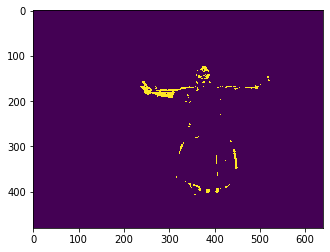

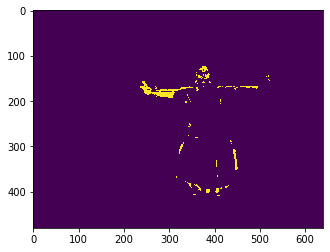

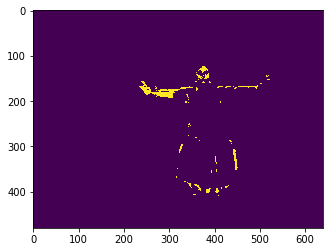

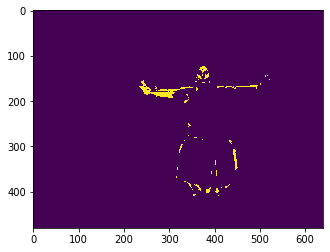

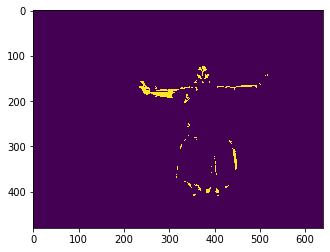

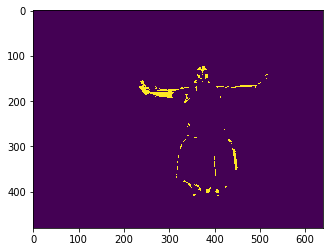

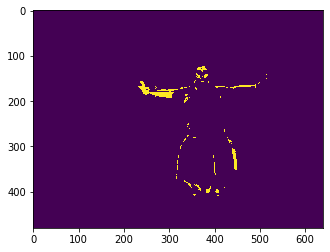

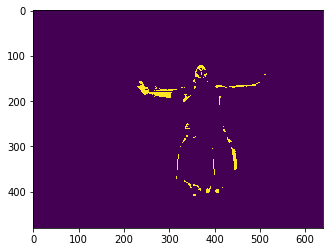

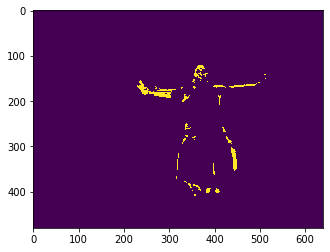

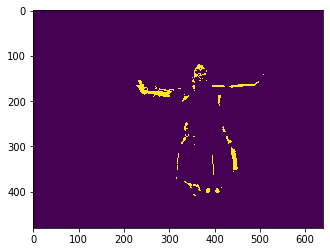

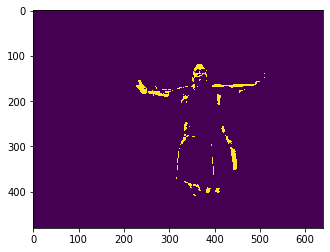

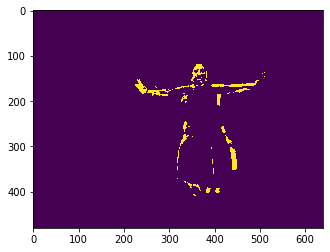

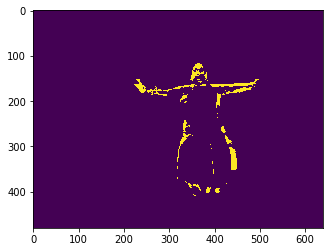

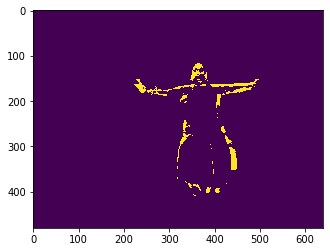

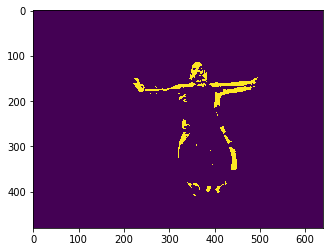

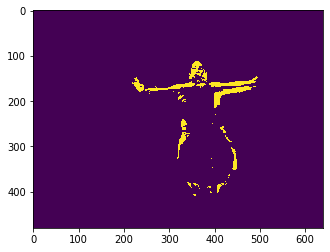

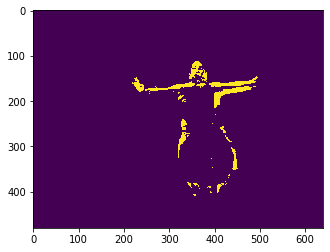

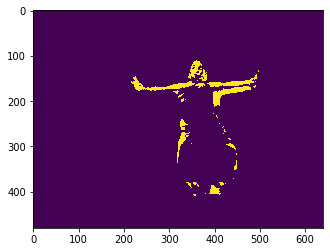

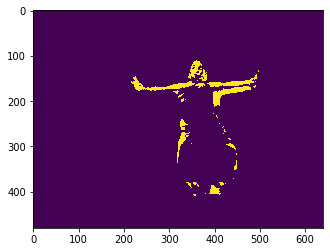

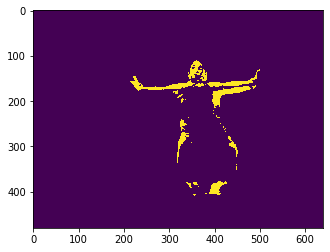

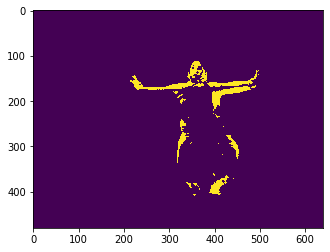

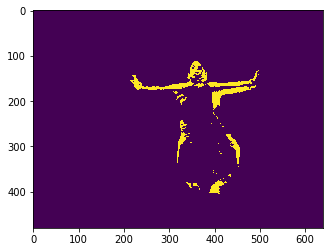

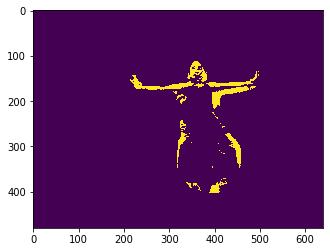

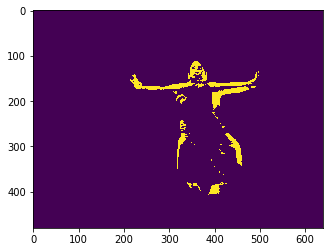

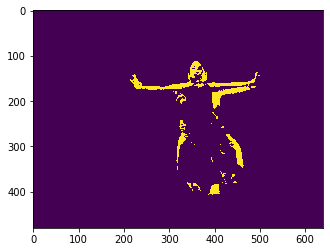

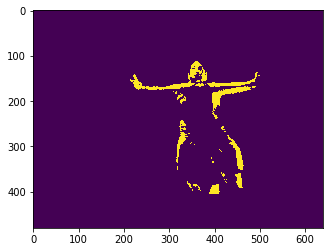

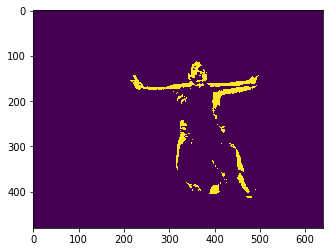

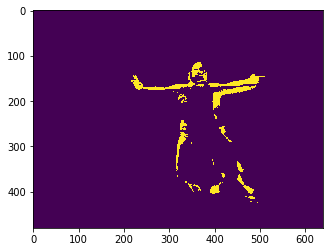

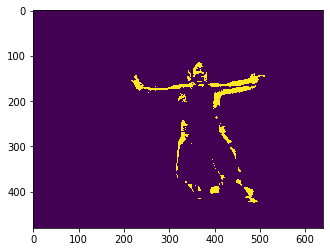

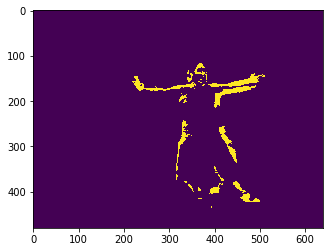

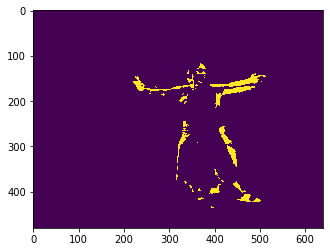

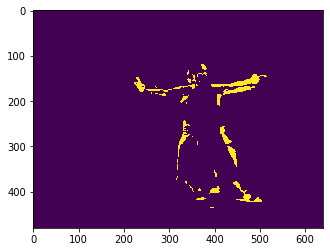

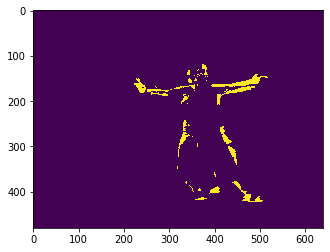

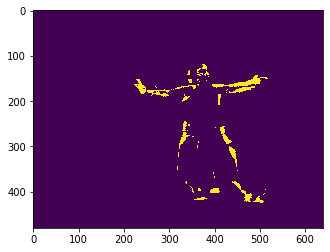

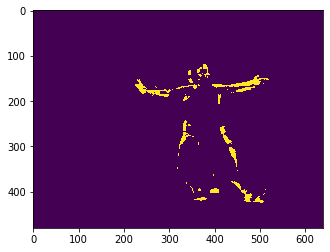

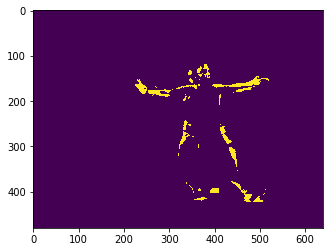

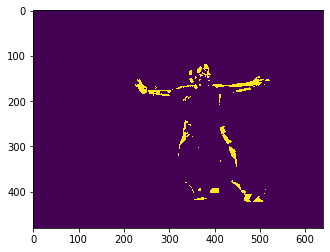

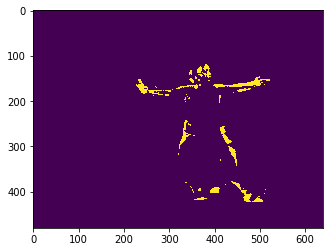

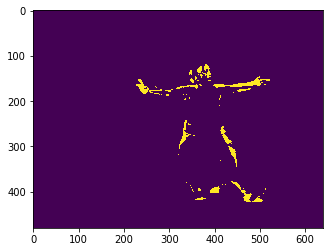

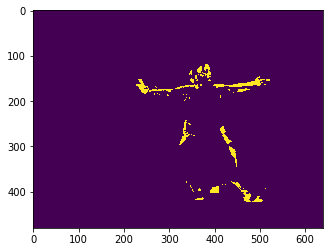

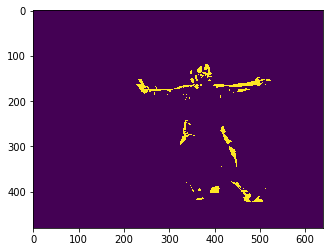

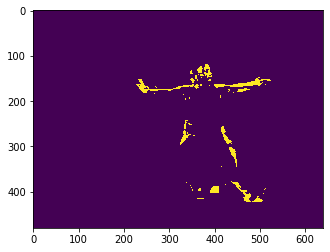

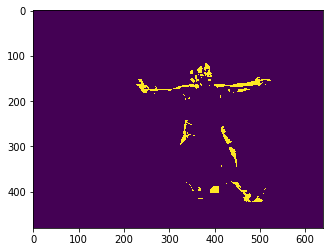

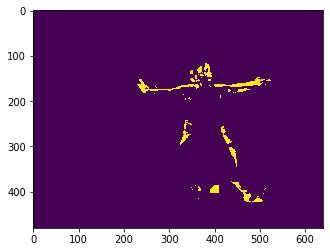

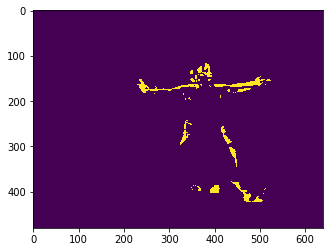

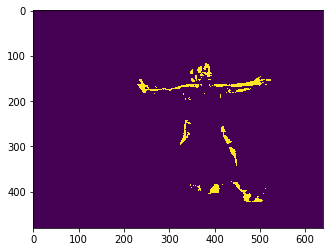

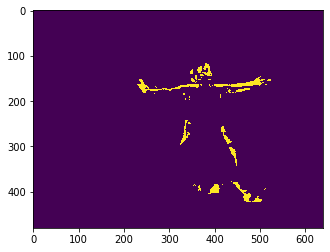

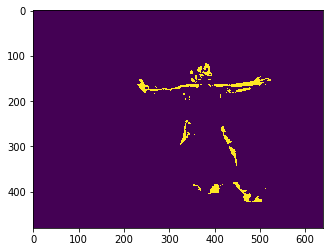

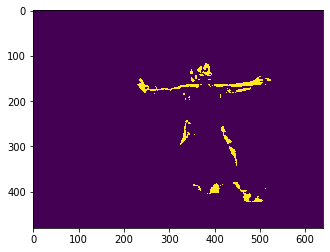

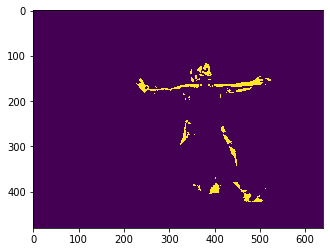

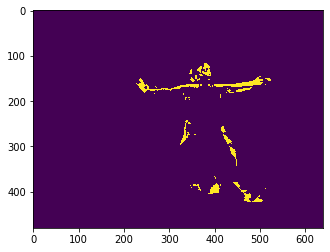

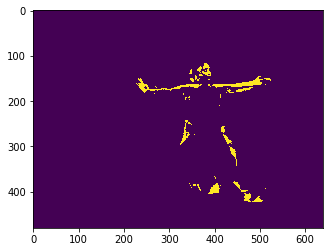

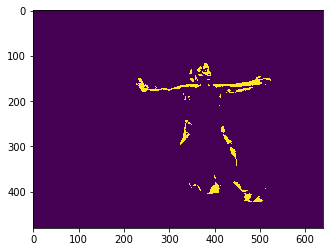

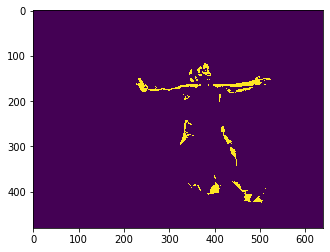

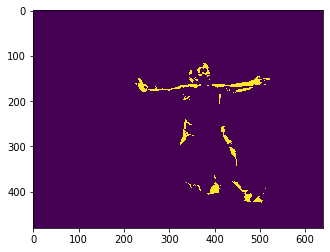

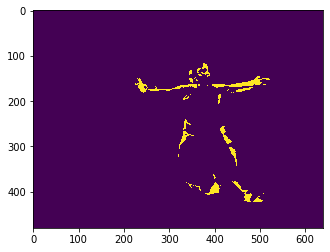

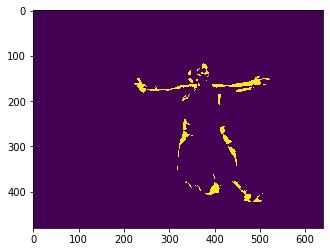

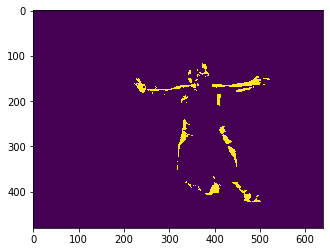

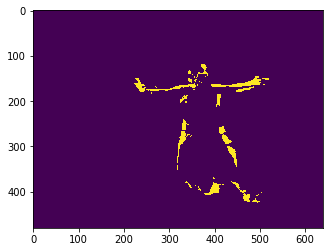

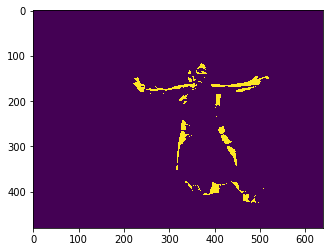

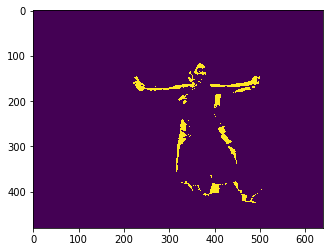

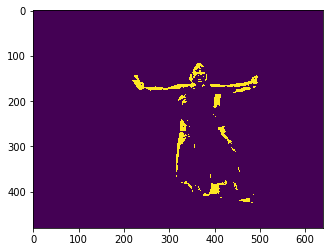

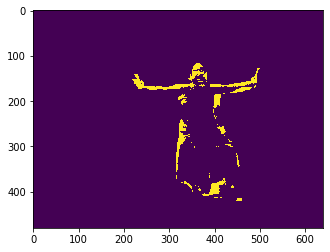

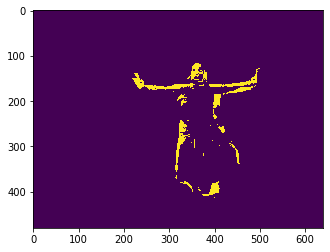

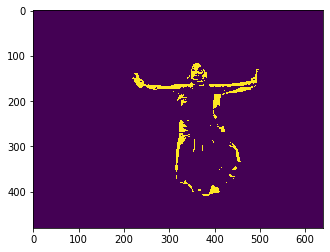

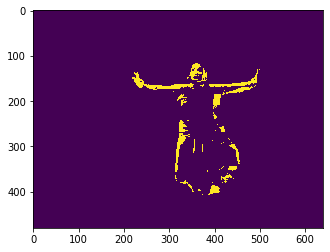

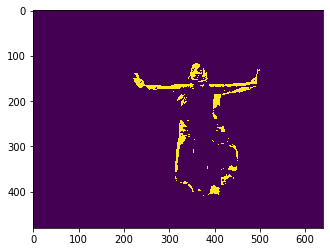

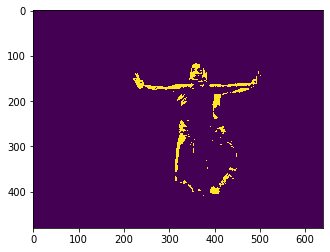

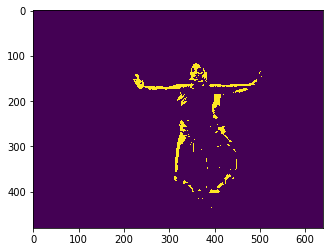

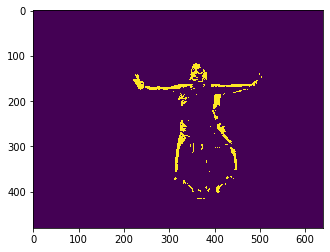

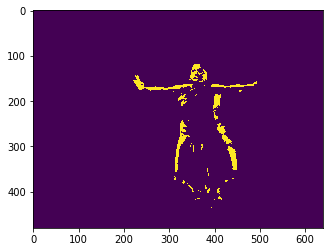

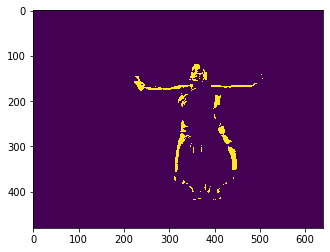

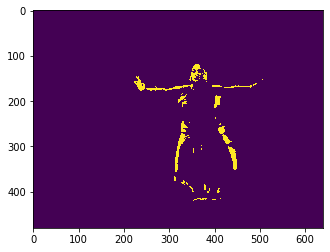

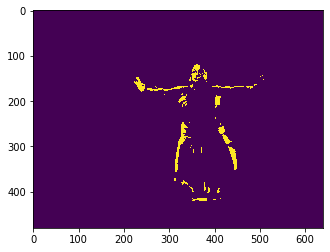

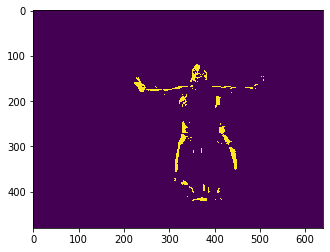

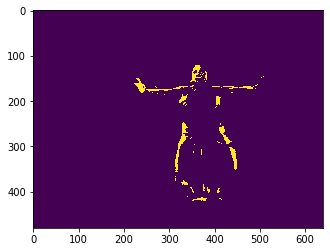

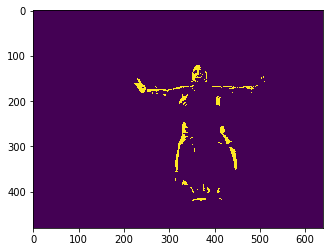

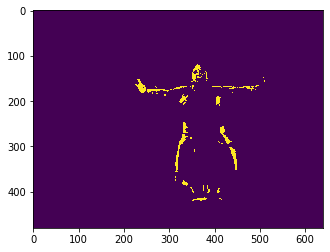

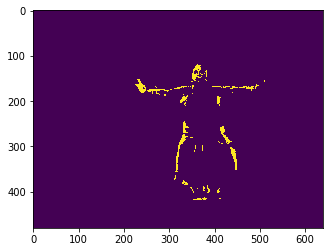

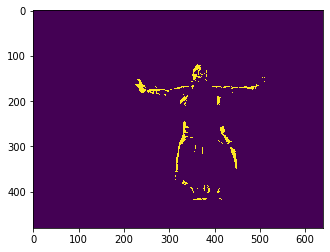

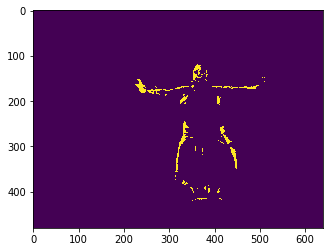

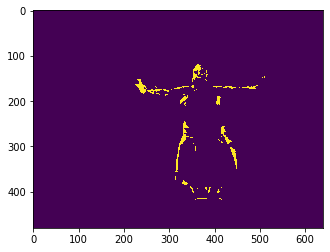

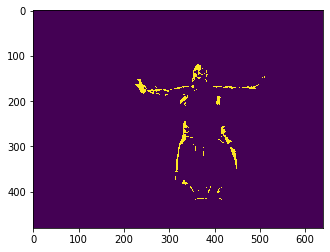

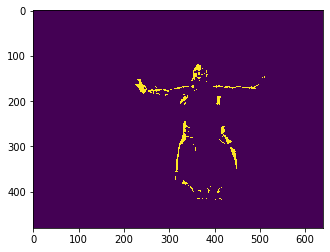

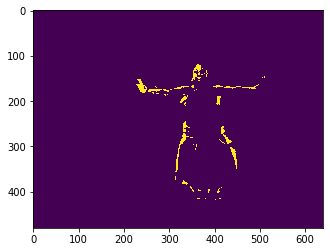

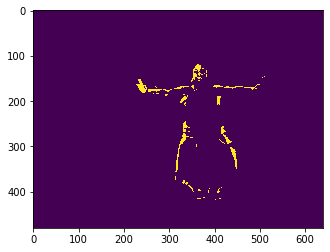

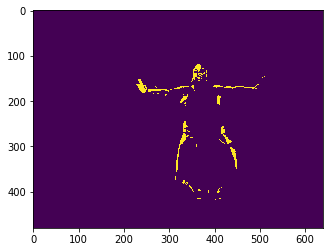

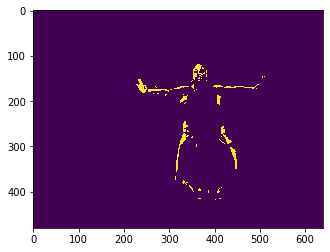

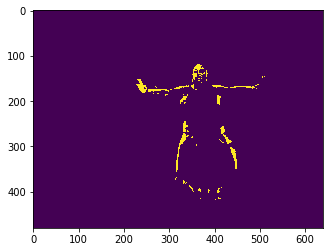

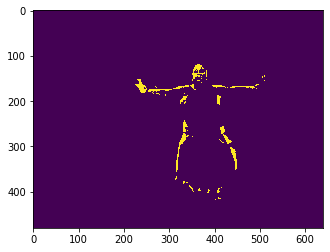

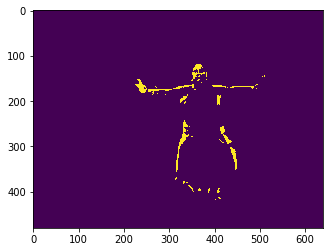

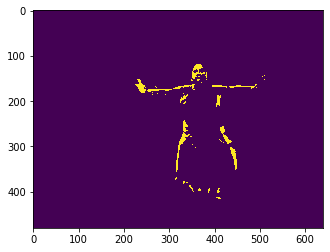

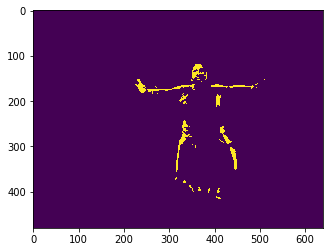

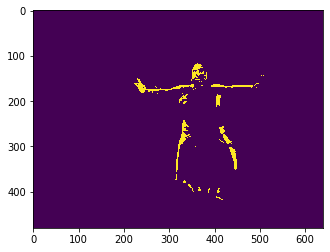

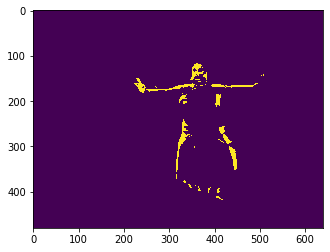

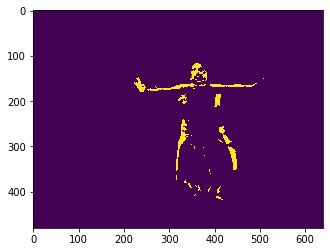

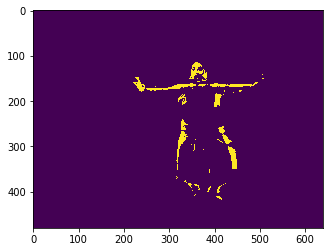

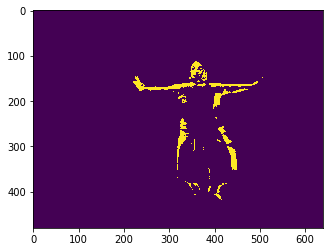

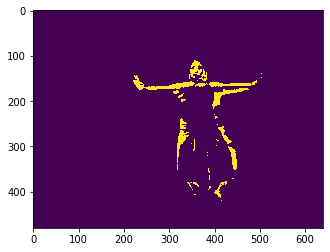

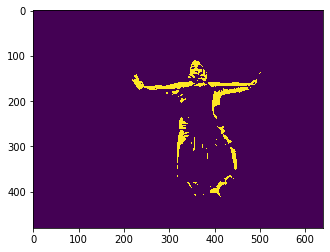

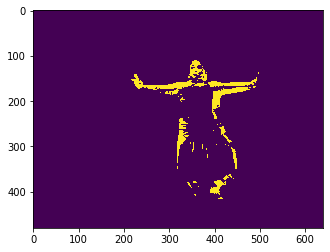

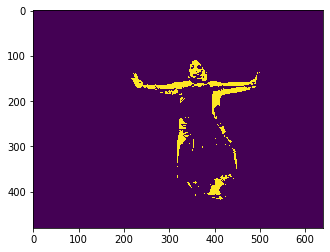

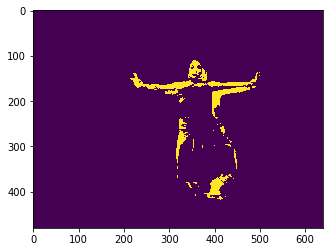

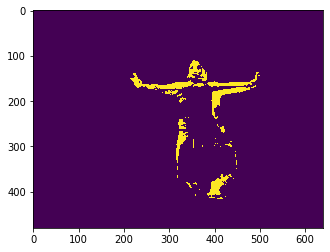

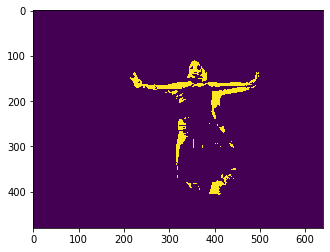

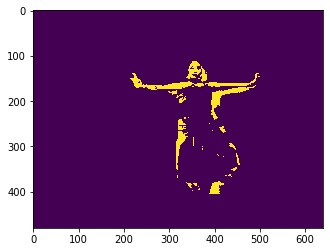

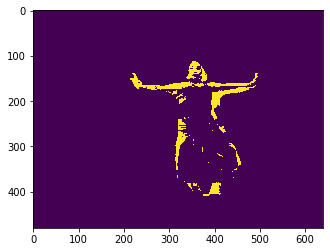

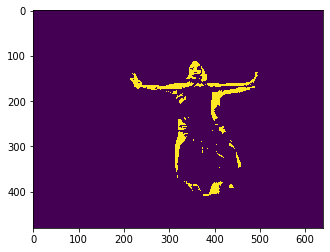

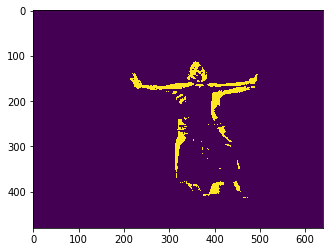

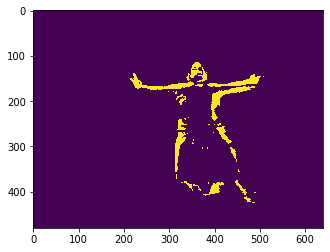

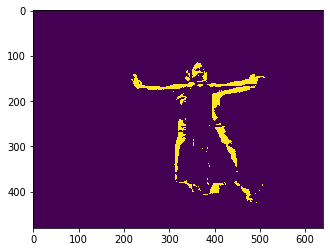

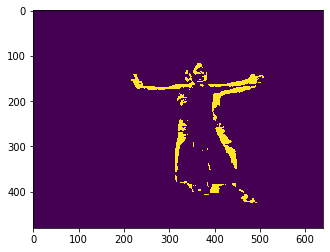

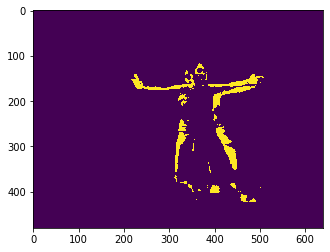

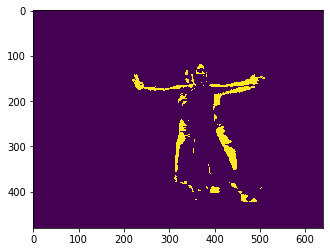

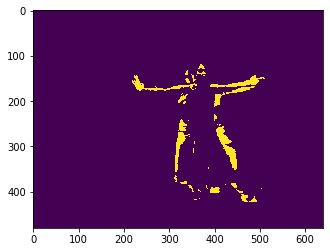

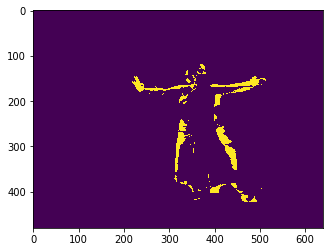

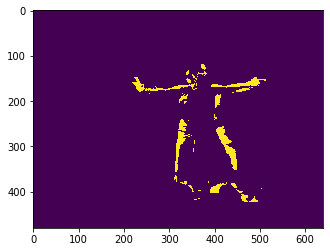

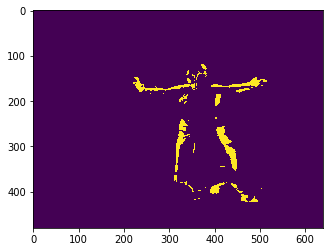

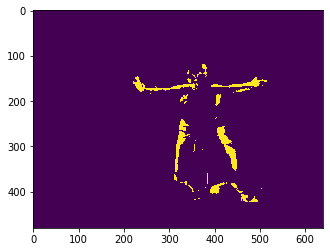

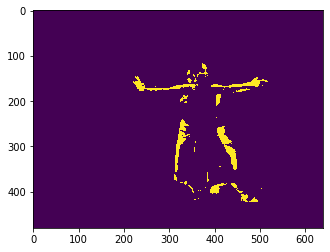

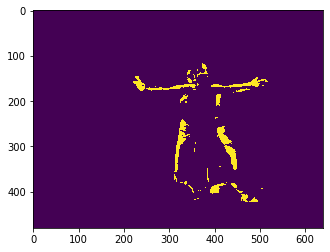

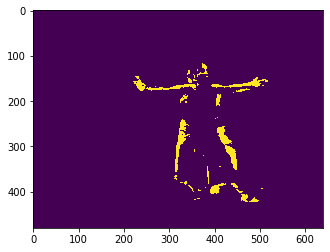

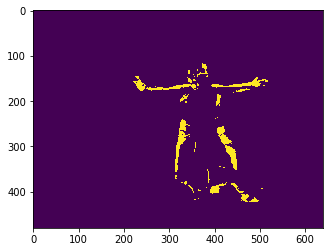

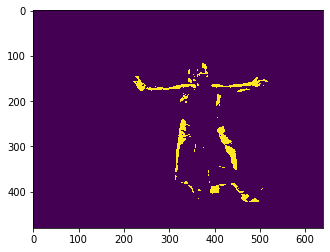

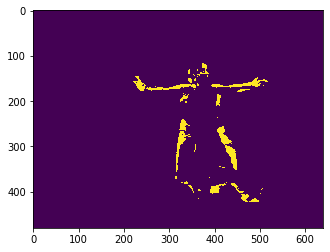

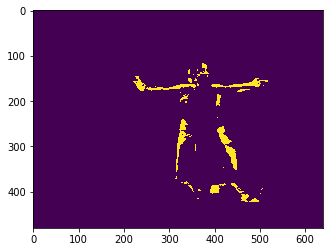

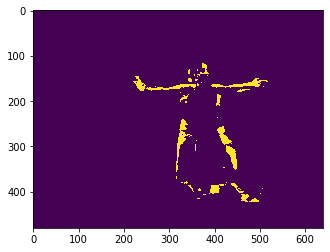

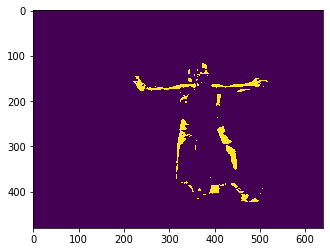

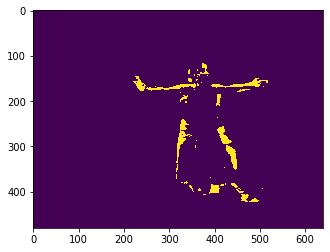

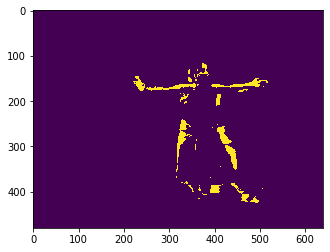

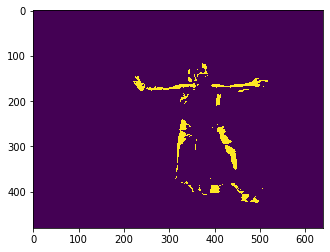

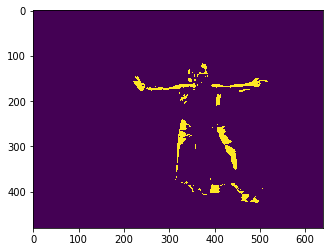

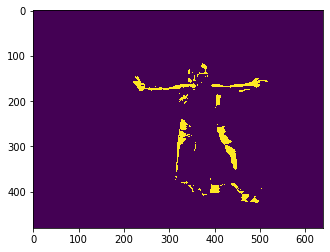

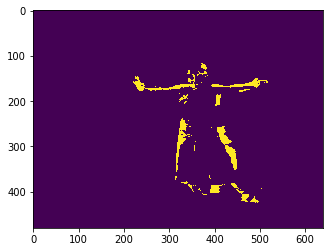

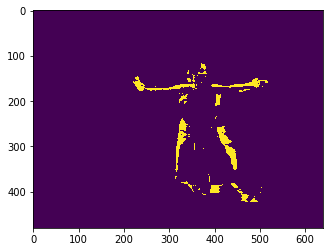

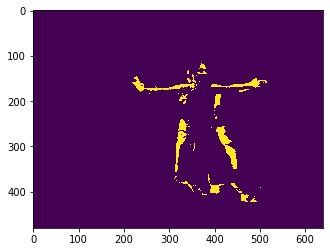

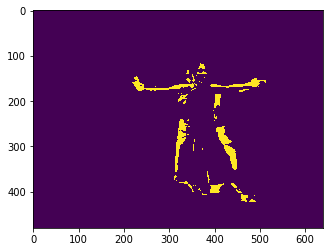

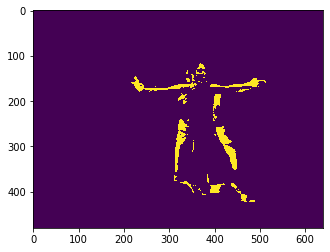

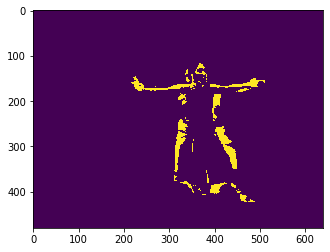

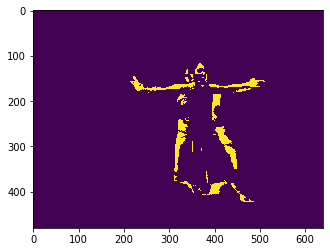

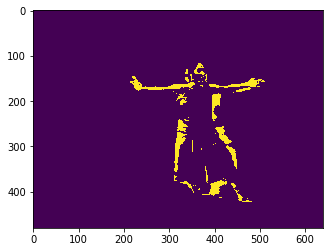

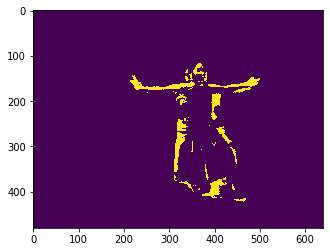

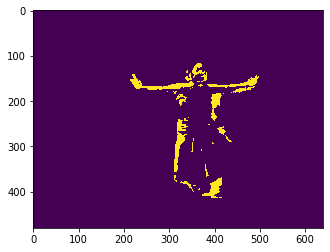

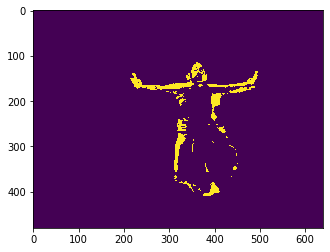

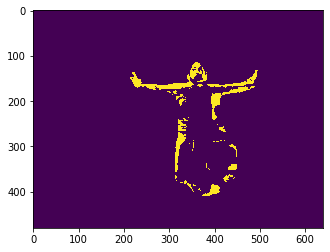

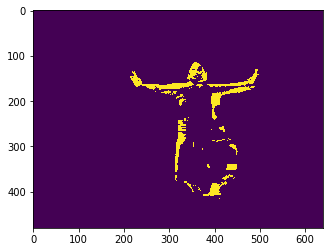

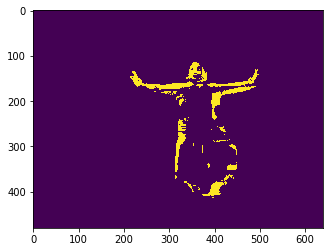

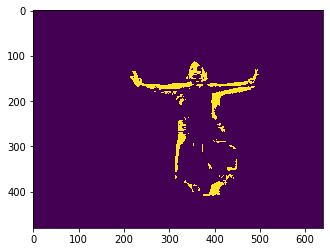

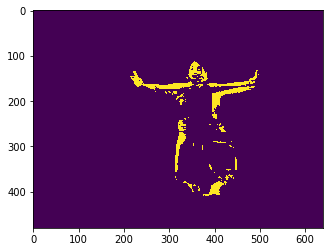

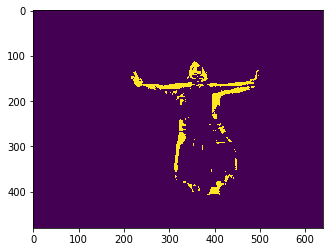

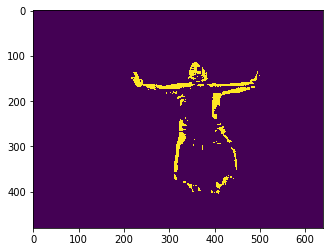

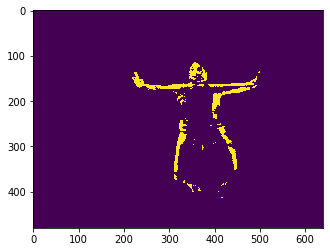

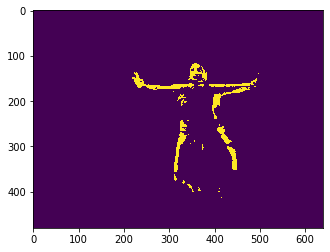

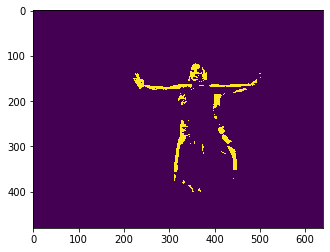

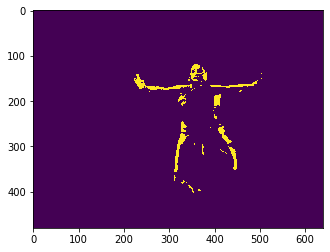

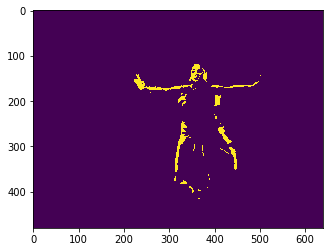

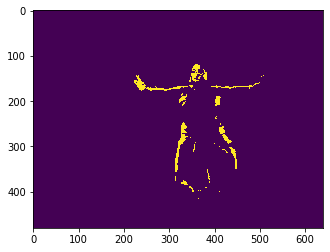

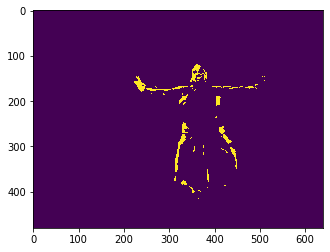

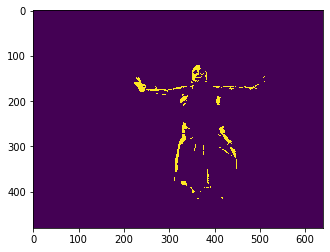

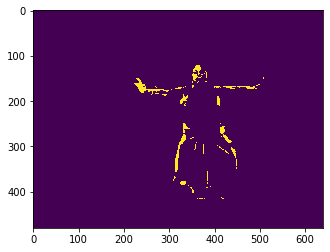

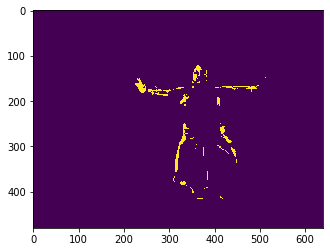

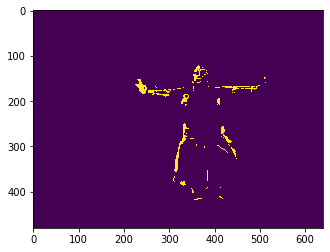

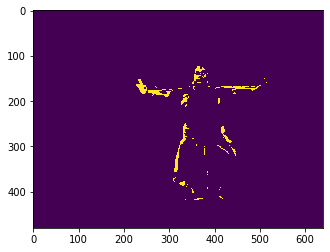

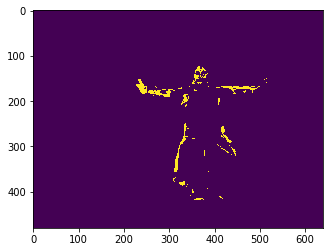

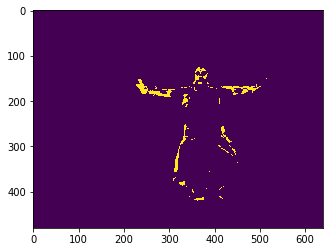

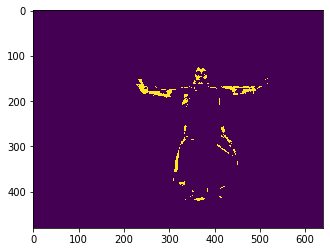

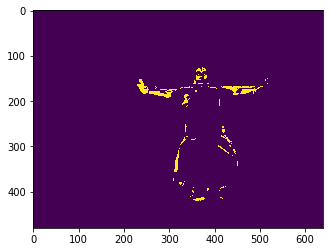

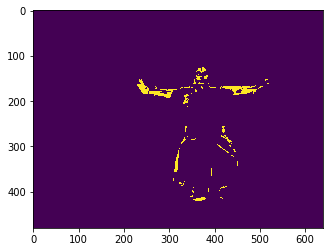

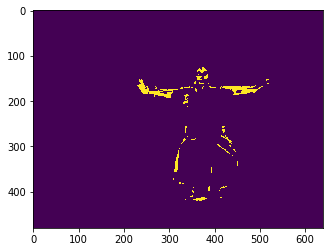

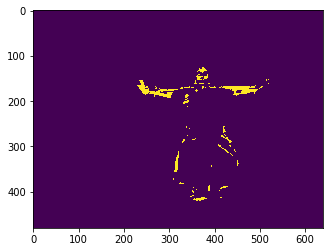

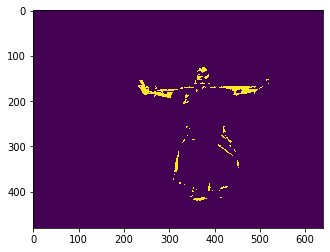

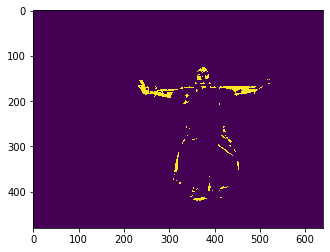

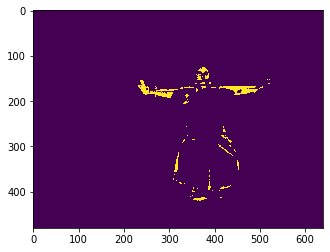

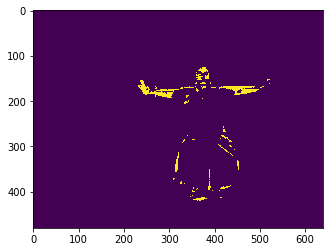

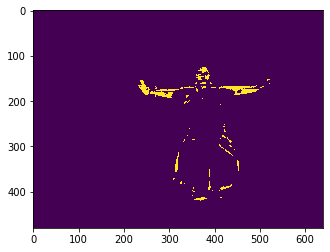

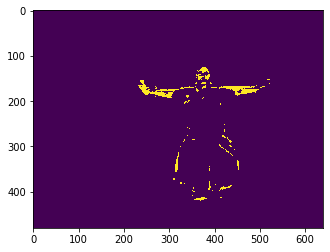

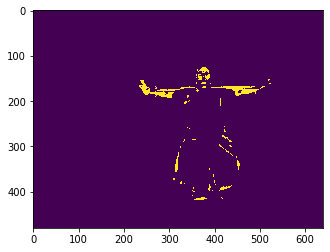

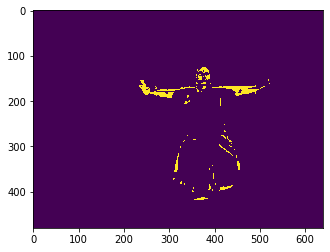

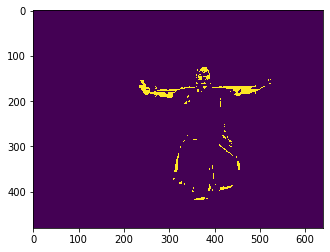

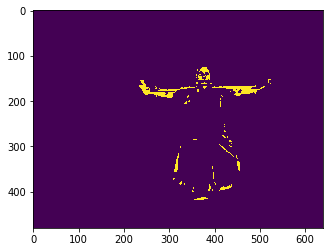

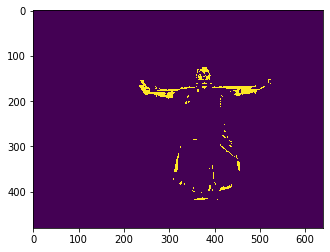

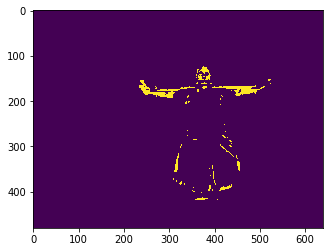

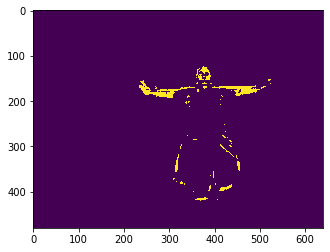

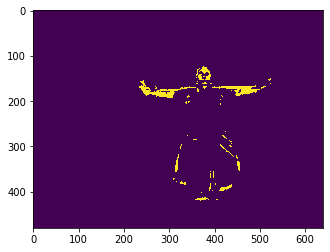

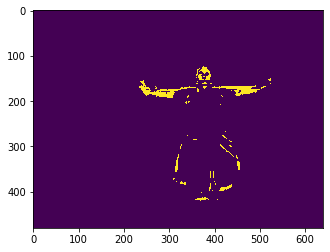

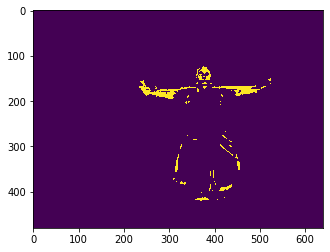

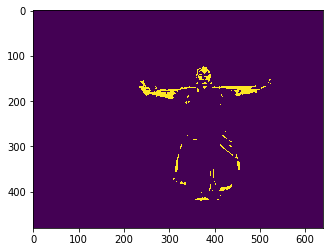

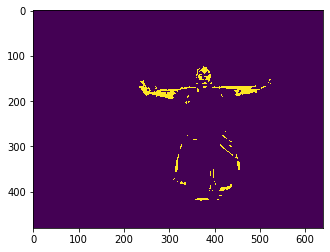

error: ignored

In [8]:
# Loop over all frames
ret = True
while(ret):

  # Read frame
  ret, frame =cap.read()

  # Convert current frame to grayscale
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Calculate absolute difference of current frame and 
  # the median frame
  dframe = cv2.absdiff(frame, grayMedianFrame)
  # Treshold to binarize
  th, dframe = cv2.threshold(dframe, 30, 255, cv2.THRESH_BINARY)
  # Display image
  plt.imshow(dframe)
  plt.show()

In [0]:
# Release video object
cap.release()

# Destroy all windows
cv2.destroyAllWindows()

full body detection and tracking

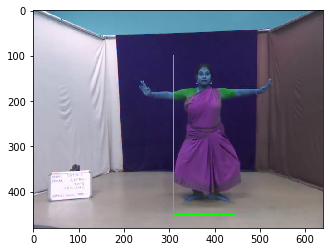

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh


def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (0, 255, 0), thickness)


if __name__ == '__main__':

    hog = cv2.HOGDescriptor()
    hog.setSVMDetector( cv2.HOGDescriptor_getDefaultPeopleDetector() )
    cap=cv2.VideoCapture('Adavu__Natta_2.mp4')
    while True:
        _,frame=cap.read()
        #print(frame)
        if frame is None:
          break
        found,w=hog.detectMultiScale(frame, winStride=(8,8), padding=(32,32), scale=1.05)
        draw_detections(frame,found)
        plt.imshow(frame)
        ch = 0xFF & cv2.waitKey(1)
        if ch == 27:
            break
    cv2.destroyAllWindows()